# Credit EDA Assignment

In [9]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Importing Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [18]:
# Set option to display all columns and rows
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
# Read the dataset "application_data.csv" into app
app = pd.read_csv("application_data.csv")

In [19]:
# Print the head of the data frame.
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,...,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,...,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-431

In [16]:
# Print the shape of data set
app.shape

(307511, 122)

In [20]:
# Print the info
app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

**Handling missing columns**

In [ ]:
# Calculate percentage of null values using mean 
100*app.isnull().mean()

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY    13.50
AMT_REQ_CREDIT_BUREAU_WEEK   13.50
AMT_REQ_CREDIT_BUREAU_MON    13.50
AMT_REQ_CREDIT_BUREAU_QRT    13.50
AMT_REQ_CREDIT_BUREAU_YEAR   13.50
Length: 122, dtype: float64

In [64]:
# Trial to drop the columns whose cut off is >40%
cut_off = 40
cols_to_drop = list(app.columns[100*app.isnull().mean()>cut_off])
print(cols_to_drop)
print("no. of columns dropped: ", len(cols_to_drop))

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

These all columns have more missing values. Therefore we can drop these columns  

In [65]:
# Drop the columns with higher missing values and storing it in another dataframe data. 
data = app.drop(cols_to_drop,axis = 1)

In [66]:
# Check the info after dropping the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [67]:
# Checking missing values for the remaining columns
data.isnull().sum()


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

Handling missing values in 'AMT_ANNUITY' column

In [68]:
#Checking null values in column "AMT_ANNUITY"
data.AMT_ANNUITY.isnull().sum()

12

In [74]:
# Finding the row with null values in column "AMT_ANNUITY"
data[data.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.00,450000.00,NaN,450000.00,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.03,-10668,-2523,-4946.00,-3238,1,1,1,1,1,0,High skill tech staff,1.00,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.63,0.37,1.00,0.00,1.00,0.00,-2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,1.00
50035,157917,0,Cash loans,F,N,N,0,94500.00,450000.00,NaN,450000.00,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.04,-9027,-1270,-3640.00,-741,1,1,1,1,0,0,Laborers,2.00,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.73,0.47,0.00,0.00,0.00,0.00,-706.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,1.00
51594,159744,0,Cash loans,F,N,N,0,202500.00,539100.00,NaN,450000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.05,-17376,-3950,-11524.00,-831,1,1,0,1,0,0,Cooking staff,2.00,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.74,0.45,1.00,0.00,1.00,0.00,-199.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,1.00
55025,163757,0,Cash loans,F,N,N,0,162000.00,296280.00,NaN,225000.00,Unaccompanied,State servant,Higher education,Married,House / apartment,0.04,-11329,-2040,-3195.00,-3069,1,1,0,1,0,0,Core staff,2.00,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.57,0.22,0.00,0.00,0.00,0.00,-2841.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,4.00
59934,169487,0,Cash loans,M,Y,N,0,202500.00,360000.00,NaN,360000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.05,-19762,-2498,-11285.00,-3305,1,1,1,1,1,0,Laborers,1.00,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.58,0.18,0.00,0.00,0.00,0.00,-743.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,1.00,0.00,0.00,6.00
75873,187985,0,Cash loans,M,Y,N,0,144000.00,219249.00,NaN,166500.00,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.02,-20831,-2450,-771.00,-4203,1,1,0,1,0,0,Drivers,1.00,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.67,0.43,0.00,0.00,0.00,0.00,-1986.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,11.00
89343,203726,0,Cash loans,F,Y,N,0,90000.00,157500.00,NaN,157500.00,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.02,-12134,-3721,-858.00,-591,1,1,0,1,1,0,Medicine staff,2.00,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.15,0.30,0.00,0.00,0.00,0.00,-348.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,0.00
123872,243648,0,Cash loans,F,N,Y,0,202500.00,929088.00,NaN,720000.00,Unaccompanied,Working,Secondary / secondary special,Civ

Annuity is the amount to be paid yearly against loan. Therefore, the annuity will come in picture after loan is sanctioned.
Since, the Credit EDA module assignment problem statement - II mentions that replacing missing values is not necessary, we are keeping missing values as it is in "AMT_ANNUITY" column

In [ ]:
# Handling missing values in 'AMT_GOODS_PRICE' column

In [250]:
# Checking null values in column "AMT_GOODS_PRICE"
data.AMT_GOODS_PRICE.isnull().sum()

307511

In [251]:
# Finding the "AMT_GOODS_PRICE" having null values in column "NAME_CONTRACT_TYPE" to know null values against loan type
data[data.AMT_GOODS_PRICE.isnull()]['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [254]:
data.AMT_GOODS_PRICE = data.AMT_GOODS_PRICE.fillna(0, inplace = True)

It is understood from above code result that all the missing values in 'AMT_GOODS_PRICE' column are against 'NAME_CONTRACT_TYPE' as Revolving Loans.
A revolving loan facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. 
From the definition of a revolving loan it is understood that revolving loans are not sanctioned for any specific purpose. Therefore, we can replace NaN values with 0.



In [419]:
data.AMT_GOODS_PRICE.isnull().sum()

0

In [ ]:
# Handling missing values in 'NAME_TYPE_SUITE' column

In [72]:
# Checking null values in column "NAME_TYPE_SUITE"
data.NAME_TYPE_SUITE.isnull().sum()

1292

In [76]:
# Finding the row with null values in column "NAME_TYPE_SUITE"
data[data.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.00,315000.00,9679.50,315000.00,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,-13866,-2546,-5448.00,-4097,1,1,0,1,0,0,Drivers,2.00,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.58,0.10,0.00,0.00,0.00,0.00,-3.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
724,100837,0,Revolving loans,F,N,Y,2,45000.00,135000.00,6750.00,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.02,-10072,-381,-519.00,-1834,1,1,1,1,0,0,Core staff,4.00,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.38,NaN,2.00,1.00,2.00,1.00,-2011.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.00,533668.50,34636.50,477000.00,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.05,-21717,-2393,-5486.00,-4513,1,1,0,1,0,0,NaN,2.00,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.76,0.54,3.00,0.00,3.00,0.00,-3.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,4.00,0.00,0.00
1669,101954,0,Cash loans,F,Y,N,2,153000.00,1162170.00,30654.00,832500.00,NaN,State servant,Higher education,Separated,House / apartment,0.02,-12975,-1839,-3896.00,-2179,1,1,0,1,1,0,Core staff,3.00,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.69,0.53,0.00,0.00,0.00,0.00,-2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
1862,102183,0,Cash loans,F,Y,N,0,121500.00,268659.00,13774.50,243000.00,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.01,-12870,-2822,-777.00,-4371,1,1,1,1,1,0,NaN,2.00,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.49,0.18,2.00,0.00,2.00,0.00,-326.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00,0.00,0.00,0.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306273,454852,0,Revolving loans,M,N,Y,2,67500.00,202500.00,10125.00,NaN,NaN,Working,Higher education,Married,House / apartment,0.02,-14079,-1648,-2492.00,-4905,1,1,1,1,1,0,Laborers,4.00,3,3,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.61,NaN,0.00,0.00,0.00,0.00,-1154.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,0.00
306544,455158,0,Cash loans,F,N,N,0,180000.00,894825.00,23602.50,894825.00,NaN,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.03,-19625,-1634,-12077.00,-721,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,18,0,0,0,0,0,0,B

In [77]:
# Checking value counts to know the count and percentage of maximum value in "NAME_TYPE_SUITE" column
data.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [78]:
# Checking value counts to know the count and percentage of the maximum value in "NAME_TYPE_SUITE" column
data.NAME_TYPE_SUITE.value_counts(normalize = True)

NAME_TYPE_SUITE
Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.01
Other_A           0.00
Group of people   0.00
Name: proportion, dtype: float64

It is understood that approx 81% of applicants were not accompanied by anyone and therefore we can impute NaN values in "NAME_TYPE_SUITE" column with mode() values i.e., Unaccompanied

In [248]:
data.NAME_TYPE_SUITE = data.NAME_TYPE_SUITE.fillna("Unaccompanied")

In [249]:
data.NAME_TYPE_SUITE.isnull().sum()

0

In [ ]:
# Handling missing values in 'OCCUPATION_TYPE' column

In [82]:
# Checking null values in column "OCCUPATION_TYPE "
data.OCCUPATION_TYPE.isnull().sum()

96391

In [256]:
# Checking value counts to know the count and percentage of maximum value in "OCCUPATION_TYPE" column
data.OCCUPATION_TYPE.value_counts(dropna = False)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [83]:
# Checking value counts to know the count and percentage of maximum value in "OCCUPATION_TYPE" column
data.OCCUPATION_TYPE.value_counts(normalize = True, dropna = False)

OCCUPATION_TYPE
NaN                     0.31
Laborers                0.18
Sales staff             0.10
Core staff              0.09
Managers                0.07
Drivers                 0.06
High skill tech staff   0.04
Accountants             0.03
Medicine staff          0.03
Security staff          0.02
Cooking staff           0.02
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.00
Secretaries             0.00
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: proportion, dtype: float64

There are total 96391 missing values in "OCCUPATION_TYPE" which is approx. 31.3% of total values. The "OCCUPATION_TYPE" value may be a MNAR (Missing Not at Random) type missing value. Here applicant may not want to disclose their occupation.

We cannot impute such values with any mode or something. Therefore, for this case study, we will replace these values missing as 'unknown'.

In [395]:
#Replacing NaN with 'unknown'
data['OCCUPATION_TYPE'].fillna(value='unknown',inplace=True)

In [396]:
data.OCCUPATION_TYPE.isnull().sum()

0

In [ ]:
# Checking "EXT_SOURCE_2" & "EXT_SOURCE_3" columns one by one as this is some kind of normalized score from external data source

In [86]:
# We will now analyze these "EXT_SOURCE_2" & "EXT_SOURCE_3" 
print(data.EXT_SOURCE_2.isnull().sum())
print(data.EXT_SOURCE_3.isnull().sum())

660
60965


By looking at "EXT_SOURCE_2" & "EXT_SOURCE_3" we seen that all these have many missing values and we are not sure about these extneral sources and the rating/score they are providing. we can therefore choose to drop these columns

In [88]:
#Dropping "EXT_SOURCE_2" & "EXT_SOURCE_3"  columns
data.drop(columns = ['EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace = True)

In [397]:
# Check whether the above two columns are dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              0 non-null       object  
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [91]:
# Looking at dataframe again
data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [ ]:
#Checking "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE" , "OBS_60_CNT_SOCIAL_CIRCLE" & "DEF_60_CNT_SOCIAL_CIRCLE" columns one by one, 
#These columns have information about applicants social circle payment profile and days past due data


In [92]:
for i in data.columns:
  if i.startswith('OBS') or i.startswith('DEF'):
    print(data[i].value_counts(dropna = False), '\n\n')

OBS_30_CNT_SOCIAL_CIRCLE
0.00      163910
1.00       48783
2.00       29808
3.00       20322
4.00       14143
5.00        9553
6.00        6453
7.00        4390
8.00        2967
9.00        2003
10.00       1376
NaN         1021
11.00        852
12.00        652
13.00        411
14.00        258
15.00        166
16.00        133
17.00         88
18.00         46
19.00         44
20.00         30
21.00         29
22.00         22
23.00         15
25.00         11
24.00         11
27.00          5
26.00          3
30.00          2
28.00          1
29.00          1
47.00          1
348.00         1
Name: count, dtype: int64 


DEF_30_CNT_SOCIAL_CIRCLE
0.00     271324
1.00      28328
2.00       5323
3.00       1192
NaN        1021
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: count, dtype: int64 


OBS_60_CNT_SOCIAL_CIRCLE
0.00      164666
1.00       48870
2.00       29766
3.00       20215
4.00       13946
5.00        9463
6.00       

The above information is not very useful to analayze client eligibility of loan. This data in "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE" , "OBS_60_CNT_SOCIAL_CIRCLE" & "DEF_60_CNT_SOCIAL_CIRCLE" columns is of clients social circle, which may not be direclty causing any impact of clients payement track record. Therefore, we can drop these columns

In [93]:
# Dropping "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE" , "OBS_60_CNT_SOCIAL_CIRCLE" & "DEF_60_CNT_SOCIAL_CIRCLE" columns
data.drop(columns = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE" , "OBS_60_CNT_SOCIAL_CIRCLE" , "DEF_60_CNT_SOCIAL_CIRCLE"], inplace = True)

In [398]:
# Re-checking the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              0 non-null       object  
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

We can also drop the FLAG_DOCUMENT named columns, as we dont know which FLAG is releared to which document. The documents may be crucial in eligiblity and loan sanction. But for our anaylsis since we dont know the significance of each document, we can drop these columns too.

In [95]:
#Dropping all the columns with name as "FLAG_DOCUMENT"
for i in data.columns:
  if i.startswith('FLAG_DOCUMENT'):
    data.drop(columns = i, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [399]:
#Checking for null values again in dataframe
data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                307511
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
YEARS_BIRTH                         0
YEARS_EMPLOYED                      0
YEARS_REGISTRATION                  0
YEARS_ID_PUBLISH                    0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

We can see that columns with name CREDIT BUREAU have some missing values. It is understood that some kind of check is done at hourly/daily/quartely etc. basis to get the score of client from credit bureau. 

We have 5 columns for the number of enquiries to Credit Bureau about the client. It doesn't make much sense to count the number for a very short period of time such as an hour or a day or a week before the application date. On the other had it also make lesser sense if we count the number for a very long period of time. Hence, it will be feasible for us if we take the count for a quater, which is not too short or too long time period. So, we have to do two things now:-

-  We will handle missing data for the column AMT_REQ_CREDIT_BUREAU_QRT
-  We will delete the column for the count of hour, day, week, month and year.

In [ ]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count   265992.00
mean         0.27
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        261.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense!). Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [243]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
data['AMT_REQ_CREDIT_BUREAU_QRT'] = data['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
7.00           7
8.00           7
19.00          1
261.00         1
Name: count, dtype: int64

The most common value of AMT_REQ_CREDIT_BUREAU_QRT is 0, so let's impute the NaNs by that.

In [244]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
data.loc[pd.isnull(data['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [245]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
data = data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [418]:
(round(100*(data.isnull().sum()/len(data.index)),2))

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.00
NAME_TYPE_SUITE               0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
YEARS_BIRTH                   0.00
YEARS_EMPLOYED                0.00
YEARS_REGISTRATION            0.00
YEARS_ID_PUBLISH              0.00
FLAG_MOBIL                    0.00
FLAG_EMP_PHONE                0.00
FLAG_WORK_PHONE               0.00
FLAG_CONT_MOBILE              0.00
FLAG_PHONE                    0.00
FLAG_EMAIL                    0.00
OCCUPATION_TYPE               0.00
CNT_FAM_MEMBERS     

Successfully handled the unwanted columns and missing values

**Data Cleaning**

In [ ]:
# Standardising & Binning Values 

In [97]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.00,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.00,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.00,0.00,0.00,0.00,0.00,0.00,0.00


We now see that the number of days are negative value in columns "DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE".

We will convert these values into postitive values and to years by diving the days.

In [283]:
# Checking the Gender column
data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [284]:
# Replacing the 'XNA' values with the Females as majority is Females & it won't affect our analysis
data.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

In [285]:
data.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [99]:
# Coverting the negative day values to absolute values
data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].abs()

In [100]:
# Coverting the no of days to years and round upto 1 place decimal
data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = round(data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]/365, 1)

In [101]:
#Renaming columns names "DAYS" to "YEARS" 
data.rename(columns = {"DAYS_BIRTH":"YEARS_BIRTH", "DAYS_EMPLOYED":"YEARS_EMPLOYED", "DAYS_REGISTRATION": "YEARS_REGISTRATION", "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH"}, inplace = True)

In [102]:
# Changing "DAYS_LAST_PHONE_CHANGE" to absolute values from negative values (if any) and converting to years
data["DAYS_LAST_PHONE_CHANGE"] = round(abs(data["DAYS_LAST_PHONE_CHANGE"]/365), 1)

In [103]:
#Renaming columns names "DAYS" to "YEARS" 
data.rename(columns = {"DAYS_LAST_PHONE_CHANGE":"YEARS_LAST_PHONE_CHANGE"}, inplace = True)

In [104]:
# Re-verify the dataframe
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.90,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,3.10,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45.90,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,2.30,0.00,0.00,0.00,0.00,0.00,0.00


In [107]:
# Now Creating Bins for age groups for applicants:

In [105]:
data['AGE_GROUP'] = pd.cut(data.YEARS_BIRTH, bins = [0, 18, 28, 35, 45, 50, 60, 75])


In [106]:
data.AGE_GROUP.value_counts()

AGE_GROUP
(35, 45]    84088
(50, 60]    68067
(28, 35]    55098
(45, 50]    35276
(60, 75]    35236
(18, 28]    29746
(0, 18]         0
Name: count, dtype: int64

In [108]:
# Now Creating Bins for Income Groups for applicants:

In [110]:
data['INCOME_GROUP'] = pd.cut(data.AMT_INCOME_TOTAL, bins = [0, 250000, 500000, 1500000, 3000000, 4500000, 7500000], labels = ['Very Low Income(<2.5L)', 'Low Income(2.5-5L)', 'Medium Income(5-15L)', 'Good Income(15-30L)', 'High Income(30-45L)', 'Upper Class(>75L)'])

In [111]:
data['INCOME_GROUP'].value_counts()

INCOME_GROUP
Very Low Income(<2.5L)    267733
Low Income(2.5-5L)         37076
Medium Income(5-15L)        2618
Good Income(15-30L)           67
High Income(30-45L)           12
Upper Class(>75L)              1
Name: count, dtype: int64

In [113]:
# Re-checking the dataframe
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.90,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,3.10,0.00,0.00,0.00,0.00,0.00,1.00,"(18, 28]",Very Low Income(<2.5L)
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45.90,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,2.30,0.00,0.00,0.00,0.00,0.00,0.00,"(45, 50]",Low Income(2.5-5L)
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.20,0.60,11.70,6.90,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,2.20,0.00,0.00,0.00,0.00,0.00,0.00,"(50, 60]",Very Low Income(<2.5L)
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.10,8.30,26.90,6.70,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1.70,NaN,NaN,NaN,NaN,NaN,NaN,"(50, 60]",Very Low Income(<2.5L)
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54.60,8.30,11.80,9.50,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,3.00,0.00,0.00,0.00,0.00,0.00,0.00,"(50, 60]",Very Low Income(<2.5L)
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,46.40,4.40,13.60,1.30,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,6.90,0.00,0.00,0.00,0.00,1.00,1.00,"(45, 50]",Very Low Income(<2.5L)
6,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,1395000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04,37.70,8.60,3.30,1.70,1,1,0,1,1,0,Accountants,3.00,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,4.30,0.00,0.00,0.00,1.00,1.00,2.00,"(35, 45]",Very Low Income(<2.5L)
7,100010,0,Cash loans,M,Y,Y,0,360000.00,1530000.00,42075.00,1530000.00,Unaccompanied,State servant,Higher education,Married,House / apartment,0.00,51.60,1.20,12.60,6.50,1,1,1,1,0,0,Managers,2.00,3,3,MONDAY,16,0,0,0,0,1,1,Other,2.90,0.00,0.00,0.00,0.00,0.00,0.00,"(50, 60]",Low Income(2.5-5L)
8,100011,0,Cash loans,F,N,Y,0,112500.00,1019610.00,33826.50,913500.00,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,55.10,1000.70,20.30,9.60,1,0,0,1,0,0,NaN,2.00,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"(50, 60]",Very Low Income(<2.5L)
9,100012,0,Revolving loans,M,N,Y,0,135000.00,405000.00,20250.00,405000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,39.60,5.50,39.60,10.90,1,1,0,1,0,0,Laborers,1.00,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,4.60,NaN,NaN,Na

  Now assigning new column **"DEF_NOTDEF"** based on Target Variable, where **Target = 0** will be **NON-DEFAULTER** and **Target = 1** will be **DEFAULTER**

In [114]:
data['DEF_NOTDEF'] = np.where(data.TARGET == 0, 'NON-DEFAULTER', 'DEFAULTER')

In [258]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,None,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.90,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,3.10,0.00,"(18, 28]",Very Low Income(<2.5L),DEFAULTER
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,None,Family,State servant,Higher education,Married,House / apartment,0.00,45.90,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,2.30,0.00,"(45, 50]",Low Income(2.5-5L),NON-DEFAULTER
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,None,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.20,0.60,11.70,6.90,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,2.20,0.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,None,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.10,8.30,26.90,6.70,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1.70,0.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,None,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54.60,8.30,11.80,9.50,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,3.00,0.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER


**Checking the distrubution of Defaulters vs Non-defaulters in Dataframe**

In [116]:
data.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

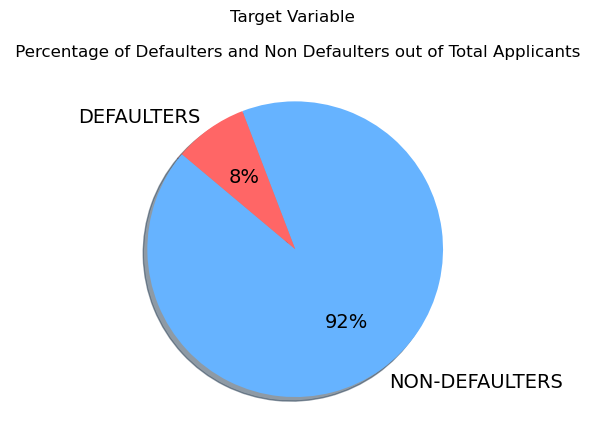

In [121]:
plt.pie(data.DEF_NOTDEF.value_counts(), autopct='%1.f%%', labels= ['NON-DEFAULTERS', 'DEFAULTERS'],colors= ['#66b3ff', '#ff6666'], shadow=True, startangle=140, textprops={'fontsize': 14})
plt.title("Target Variable \n\n Percentage of Defaulters and Non Defaulters out of Total Applicants")
plt.show()

**Observations:**

Most of the applicants are non defaulters as we seen here. More than 92% of people didn't default as compared to 8% who are defaulters.

**Dividing the dataframe into two categories based on defaulters and non-defaulters. We will create two dataframes now for carrying our further analysis**

In [118]:
def_r = data[data.TARGET == 1]
non_def = data[data.TARGET == 0]

In [259]:
def_r.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,25.90,1.70,10.00,5.80,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,3.10,0.00,0.00,0.00,0.00,0.00,1.00,"(18, 28]",Very Low Income(<2.5L),DEFAULTER
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.02,51.30,7.20,18.00,5.00,1,1,0,1,0,0,Cooking staff,1.00,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.40,0.00,0.00,0.00,0.00,2.00,2.00,"(50, 60]",Very Low Income(<2.5L),DEFAULTER
40,100047,1,Cash loans,M,N,Y,0,202500.00,1193580.00,35028.00,855000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,47.90,3.50,3.20,2.80,1,1,0,1,0,0,Laborers,2.00,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,2.90,0.00,0.00,0.00,2.00,0.00,4.00,"(45, 50]",Very Low Income(<2.5L),DEFAULTER
42,100049,1,Cash loans,F,N,N,0,135000.00,288873.00,16258.50,238500.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,36.70,9.90,0.10,12.10,1,1,1,1,1,0,Sales staff,2.00,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,4.10,0.00,0.00,0.00,0.00,0.00,2.00,"(35, 45]",Very Low Income(<2.5L),DEFAULTER
81,100096,1,Cash loans,F,N,Y,0,81000.00,252000.00,14593.50,252000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,67.90,1000.70,14.80,11.50,1,0,0,1,0,0,NaN,2.00,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"(60, 75]",Very Low Income(<2.5L),DEFAULTER


In [260]:
non_def.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,45.90,3.30,3.20,0.80,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,2.30,0.00,0.00,0.00,0.00,0.00,0.00,"(45, 50]",Low Income(2.5-5L),NON-DEFAULTER
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,52.20,0.60,11.70,6.90,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,2.20,0.00,0.00,0.00,0.00,0.00,0.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,52.10,8.30,26.90,6.70,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,1.70,NaN,NaN,NaN,NaN,NaN,NaN,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,54.60,8.30,11.80,9.50,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,3.00,0.00,0.00,0.00,0.00,0.00,0.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.04,46.40,4.40,13.60,1.30,1,1,1,1,1,0,Laborers,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,6.90,0.00,0.00,0.00,0.00,1.00,1.00,"(45, 50]",Very Low Income(<2.5L),NON-DEFAULTER


**Checking Data Imbalance**

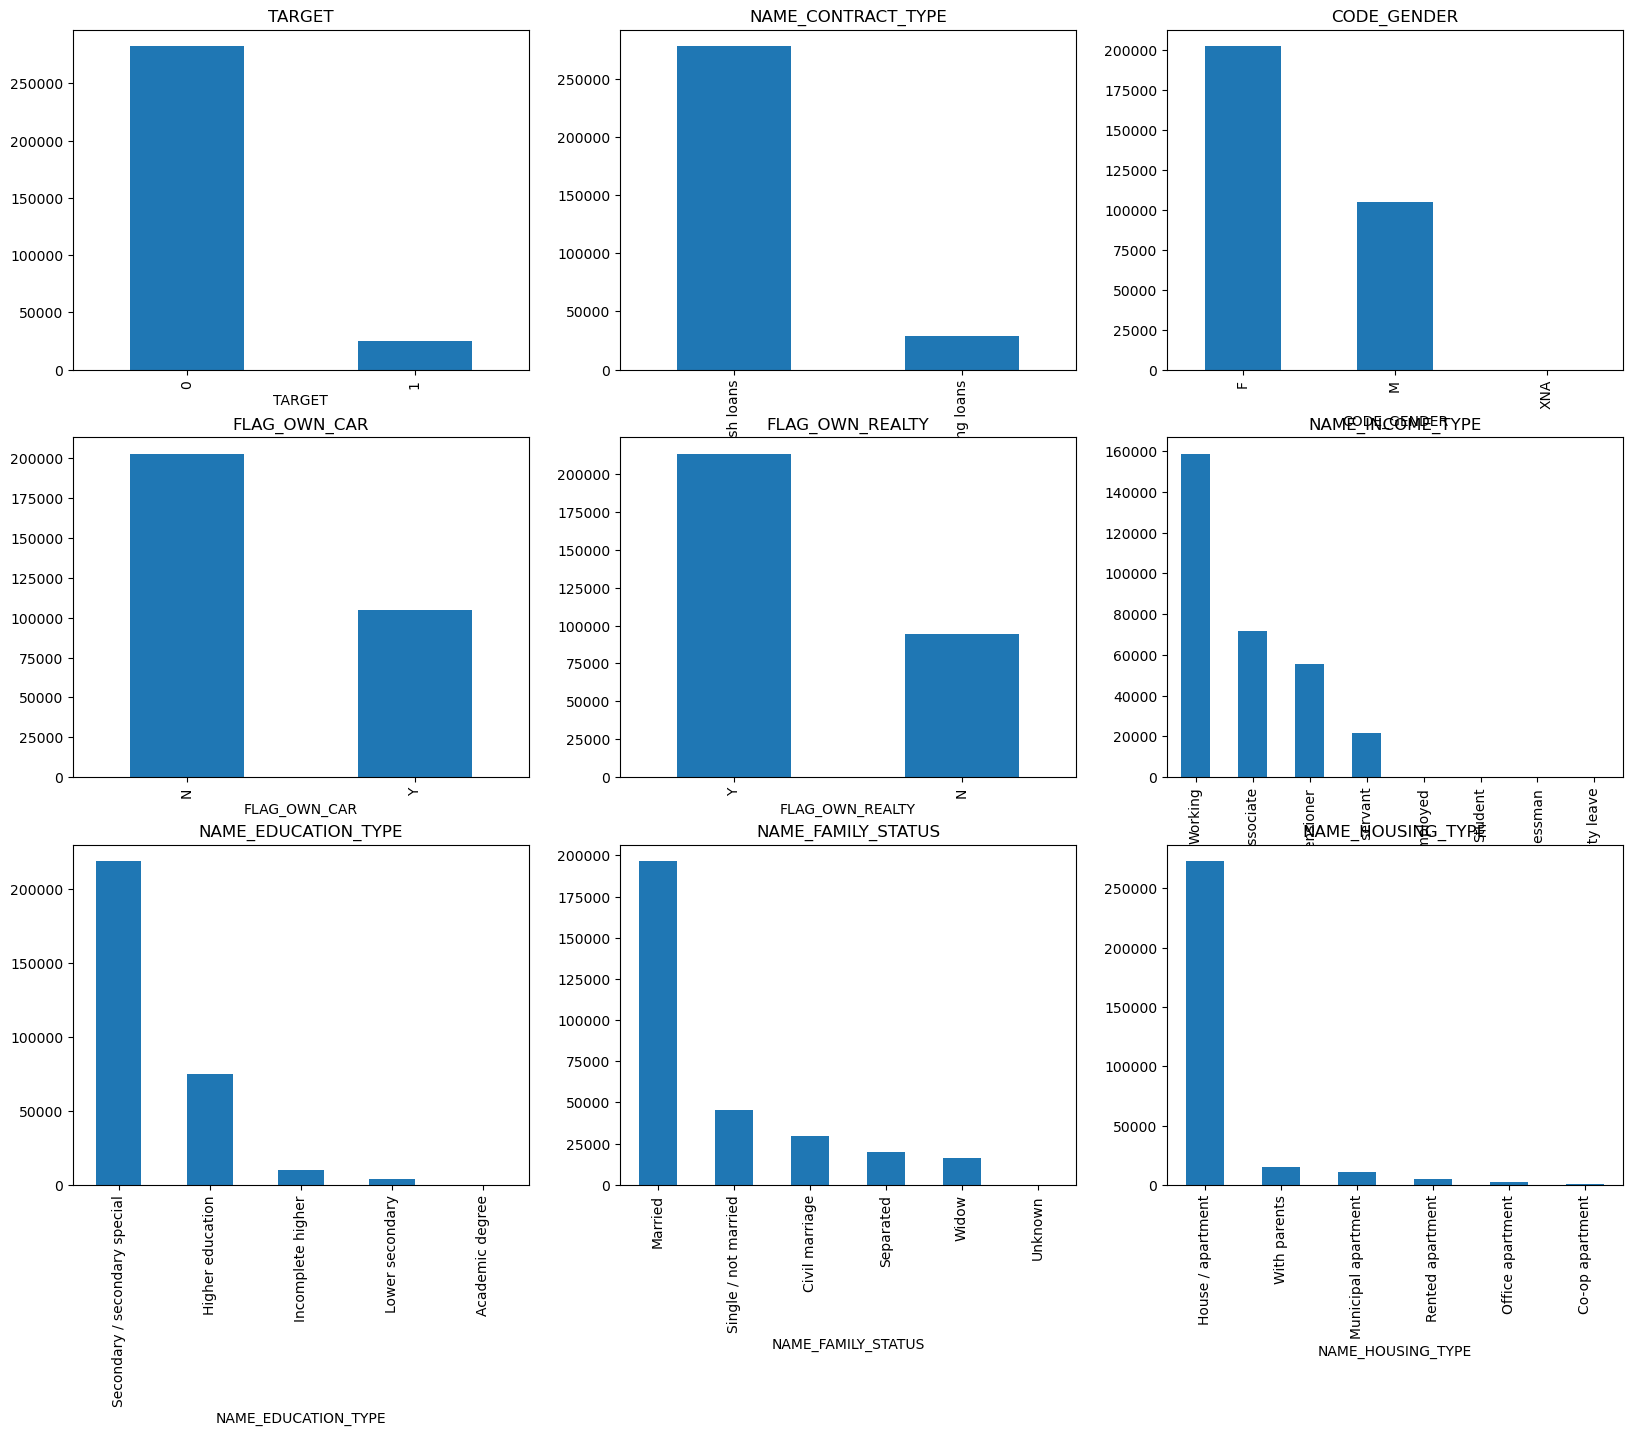

In [269]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    data[col].value_counts().plot(kind='bar');
    plt.title(col)

We can see that there is data imbalance in below columns:-
-  TARGET - There are very few defaulters(1) compare to non defaulters(0).
-  NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans.
-  NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
-  NAME_FAMILY_STATUS - Most of the loans applied by Married people.
-  NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

**Univarient Analysis**

-  **Categorical variable Analysis**

In [122]:
### Target Variable - "Gender" ###

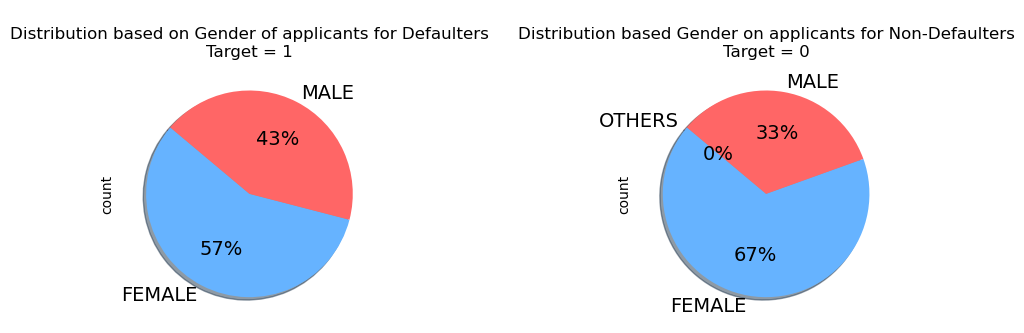

In [126]:
# Sub plots showing distribution based on Gender of applicanta for Defaulters and Non-Defaulters with pie plots
plt.figure(figsize = [10,10])
plt.subplot(1,2,1)
plt.title("Distribution based on Gender of applicants for Defaulters\nTarget = 1")
def_r.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%', labels = ['FEMALE','MALE','OTHERS'], colors= ['#66b3ff', '#ff6666'], shadow=True, startangle=140, textprops={'fontsize': 14})

plt.subplots_adjust(wspace = 1)
plt.subplot(1,2,2)
plt.title("\nDistribution based Gender on applicants for Non-Defaulters\nTarget = 0")
non_def.CODE_GENDER.value_counts().plot.pie(autopct='%1.f%%', labels = ['FEMALE','MALE','OTHERS'], colors= ['#66b3ff', '#ff6666'], shadow=True, startangle=140, textprops={'fontsize': 14})

plt.show()

**Observations**
-  Close to 60% of the applicants are Females in Defaulters
-  Close to 70% of the applicants are Females in Non-Defaulters

It seems that there are more chances of women applicants being defaulters

In [ ]:
### Target Variable - "Age Group" ###

In [124]:
data.AGE_GROUP.value_counts()

AGE_GROUP
(35, 45]    84088
(50, 60]    68067
(28, 35]    55098
(45, 50]    35276
(60, 75]    35236
(18, 28]    29746
(0, 18]         0
Name: count, dtype: int64

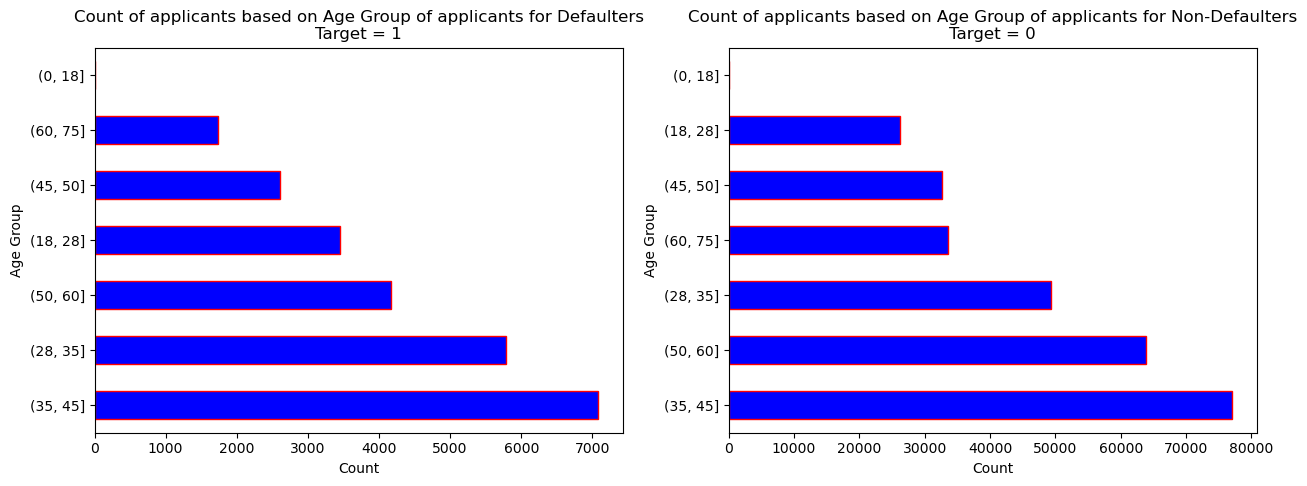

In [132]:
# subplots showing count of applicants based on Age Group of applicants for Defaulters and Non-Defaulters using horizontal bar graph
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Age Group of applicants for Defaulters\nTarget = 1")
def_r.AGE_GROUP.value_counts().plot.barh(color = 'blue', edgecolor = 'red')
plt.xlabel("Count")
plt.ylabel("Age Group")


plt.subplots_adjust(wspace = 0.2)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Age Group of applicants for Non-Defaulters\nTarget = 0")
non_def.AGE_GROUP.value_counts().plot.barh(color = 'blue', edgecolor = 'red')
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.show()

**Observations**
-  Most of the applicants are falling under age group of 35-40 years in both defaulter and non-defaulter categories
-  There are no applicant less than 18 years of age, i.e., no minor applicant

NON-DEFAULTER CATEGORY:
-  2nd highest applicants are of age group 50 - 60 years in non-defaulter category
-  3rd highest applicants are of age group 28 - 35 years in non-defaulter category

DEFAULTER CATEGORY:
-  2nd highest applicants are of age group 28 - 35 years in defaulter category
-  3rd highest applicants are of age group 50 - 60 years in defaulter category


In [128]:
### Target Variable - " Income Group" ###

In [130]:
data.INCOME_GROUP.value_counts()

INCOME_GROUP
Very Low Income(<2.5L)    267733
Low Income(2.5-5L)         37076
Medium Income(5-15L)        2618
Good Income(15-30L)           67
High Income(30-45L)           12
Upper Class(>75L)              1
Name: count, dtype: int64

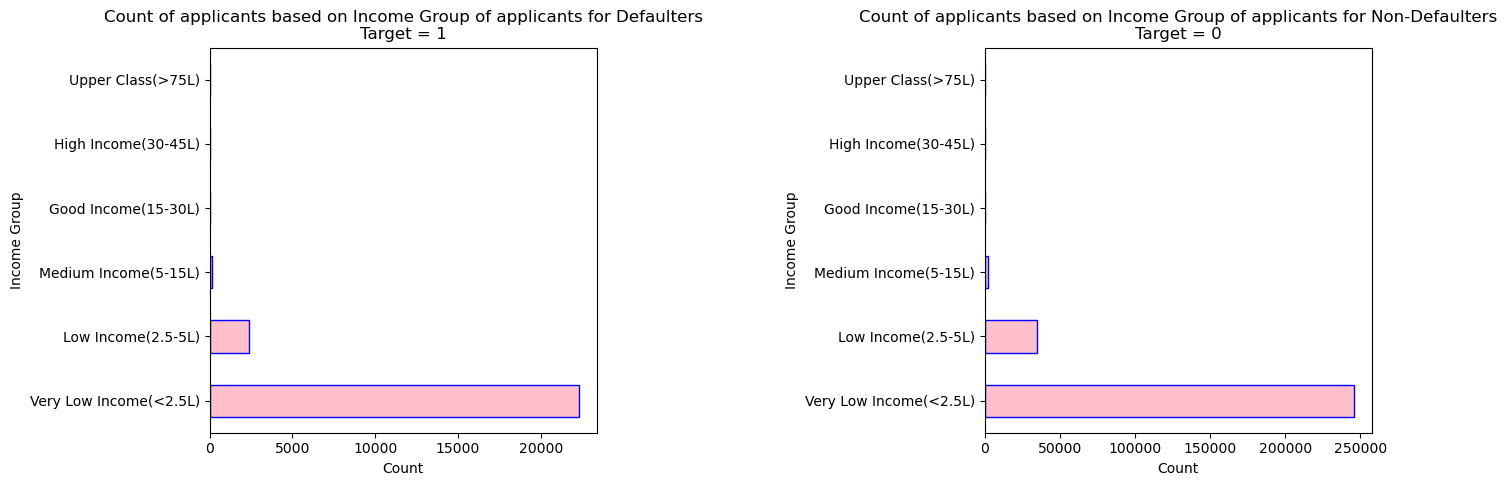

In [131]:
# Subplots showing Count of applicants based on Income Group of applicants for Defaulters and Non-Defaulters using horizontal bar graph
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Count of applicants based on Income Group of applicants for Defaulters\nTarget = 1")
def_r.INCOME_GROUP.value_counts().plot.barh(color = 'pink', edgecolor = 'blue')
plt.xlabel("Count")
plt.ylabel("Income Group")

plt.subplots_adjust(wspace = 1)
plt.subplot(1,2,2)
plt.title("Count of applicants based on Income Group of applicants for Non-Defaulters\nTarget = 0")
non_def.INCOME_GROUP.value_counts().plot.barh(color = 'pink', edgecolor = 'blue')
plt.xlabel("Count")
plt.ylabel("Income Group")
plt.show()

**Observations**
-  Most of the applicants are from very low income group i.e., less than 2.5 L
-  2nd highest applicants are from low income group i.e., between 2.5 to 5 L
-  3rd highest applicants are from medium income group i.e., between 5 to 15 L
-  There are very few applicants having higher income more than 15 L

In [261]:
#Checking dtypes again
data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                  object
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
YEARS_BIRTH                     float64
YEARS_EMPLOYED                  float64
YEARS_REGISTRATION              float64
YEARS_ID_PUBLISH                float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [140]:
#Creating a list of only numeric and categorical columns for further use if needed

In [263]:
data_float = data.columns[data.dtypes == 'float64'].tolist()
data_int = data.columns[data.dtypes == 'int64'].tolist()
numerical_data = data_float+data_int


In [265]:
numerical_data = list(data._get_numeric_data().columns)
numerical_data

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_LAST_PHONE_CHANGE']

In [272]:
len(numerical_data)

28

In [138]:
categorical_data = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_data

['AGE_GROUP',
 'FLAG_OWN_REALTY',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_CAR',
 'CODE_GENDER',
 'DEF_NOTDEF',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'INCOME_GROUP',
 'NAME_INCOME_TYPE']

In [267]:
len(categorical_data)

15

In [142]:
### Target Variable - "Occupation Type" ###

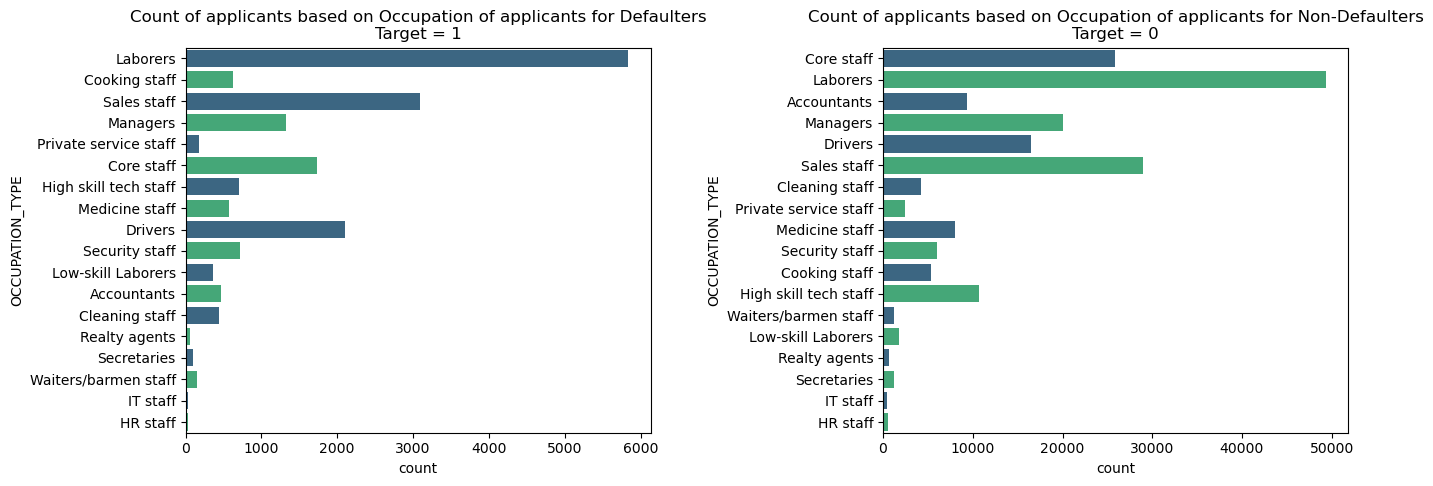

In [145]:
# Subplots showing count of applicants based on Occupation of applicants for Defaulters and Non-Defaulters
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
palette = sns.color_palette("viridis", 2)
plt.title("Count of applicants based on Occupation of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.OCCUPATION_TYPE, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("viridis", 2)
plt.title("Count of applicants based on Occupation of applicants for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.OCCUPATION_TYPE, palette=palette)
plt.show()

**Observations**
-  Most of the applicants belong to Laborer as Occupation

In [146]:
### Target Variable - " Name Income Type " ###

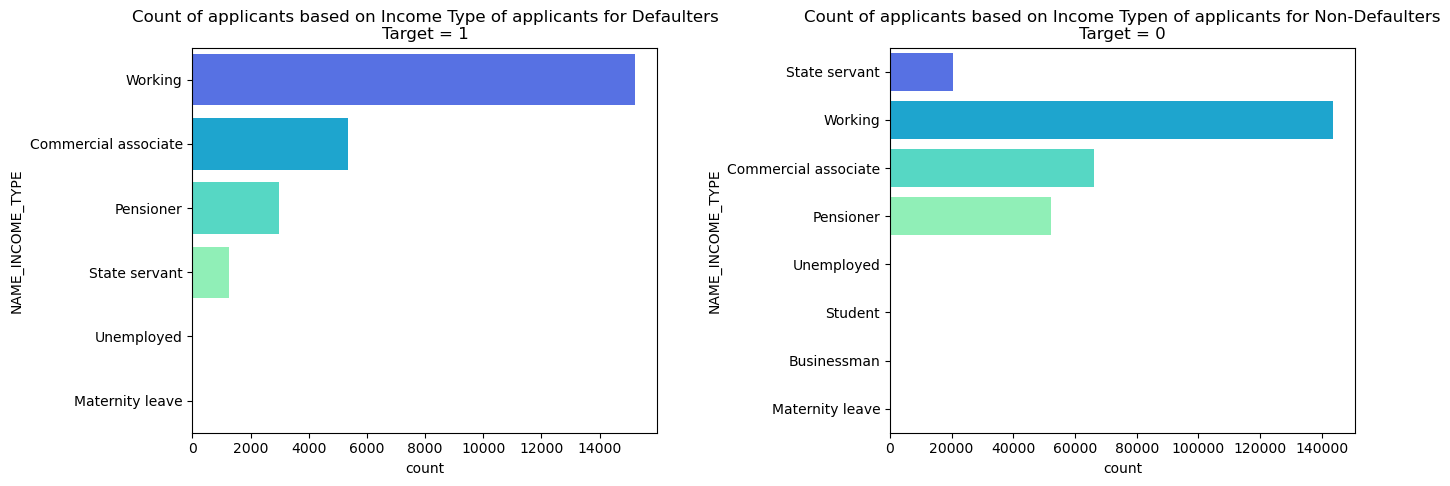

In [149]:
# Subplots showing count of applicants based on Income Type of applicants for Defaulters and Non-Defaulters
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
palette = sns.color_palette("rainbow", 7)
plt.title("Count of applicants based on Income Type of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_INCOME_TYPE, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("rainbow", 7)
plt.title("Count of applicants based on Income Typen of applicants for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_INCOME_TYPE, palette=palette)
plt.show()

**Observations**
-  We can notice that the students are falling in non-defaulters. The reason could be they are not required to pay during their college tenure.
-  We can also see that the Businessmen's are falling in non-defaulters.
-  Most of the loans are distributed to working class people
-  Pensioners are also good in number for applying loans and mostly they are non-defaulters as we can see in plots

In [150]:
### Target Variable - " Name Contract Type" ###

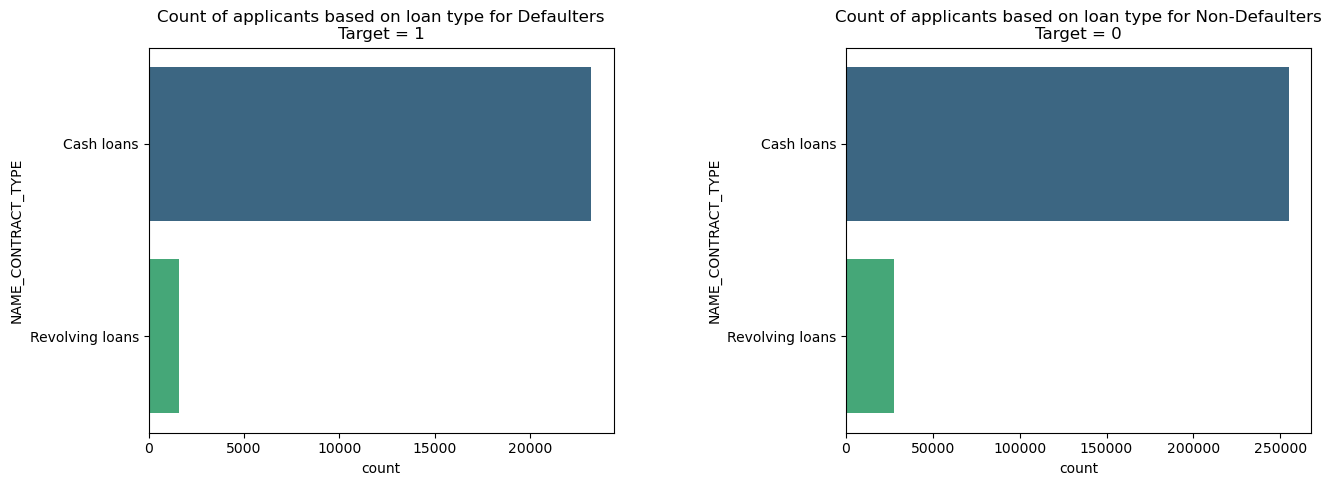

In [152]:
# Subplot showing count of applicants based on loan type for Defaulters and Non-Defaulters
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
palette = sns.color_palette("viridis", 2)
plt.title("Count of applicants based on loan type for Defaulters\nTarget = 1")
sns.countplot(def_r.NAME_CONTRACT_TYPE, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("viridis", 2)
plt.title("Count of applicants based on loan type for Non-Defaulters\nTarget = 0")
sns.countplot(non_def.NAME_CONTRACT_TYPE, palette=palette)
plt.show()

**Observations**
-  Most of the loan types are Cash Loans

In [153]:
### Target Variable - " Name Education Type" ###

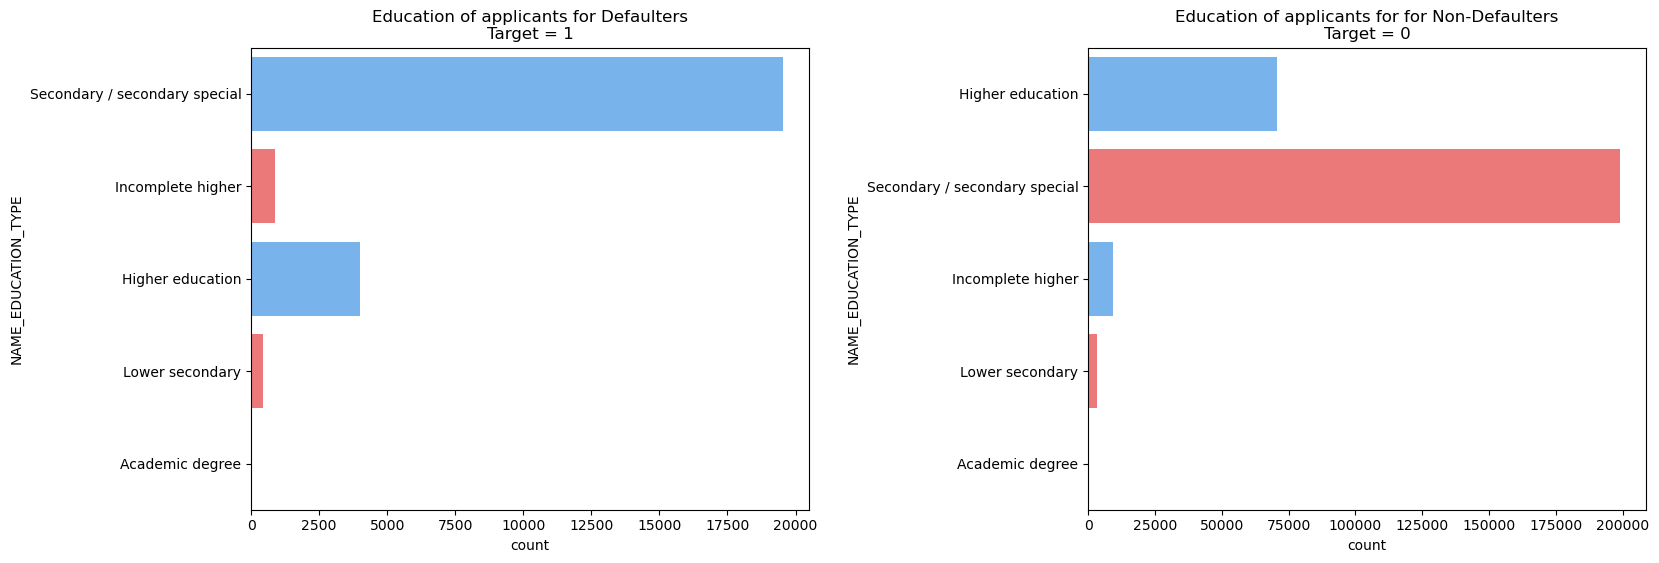

In [155]:
# Subplots showing Education of applicants for Defaulters and Non-Defaulters
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
plt.title("Education of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_EDUCATION_TYPE, palette = ['#66b3ff', '#ff6666'])

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Education of applicants for for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_EDUCATION_TYPE, palette = ['#66b3ff', '#ff6666'])
plt.show()

**Observations**
-  Most of the the applicants have completed Secondary Education in both defaulter and non-defaulter categories
-  Secondly many of the the applicants have completed Higher Education in both defaulter and non-defaulter categories
-  Academic degree holders are almost neglible in number in both defaulter and non-defaulter categories

In [156]:
### Target Variable - " Name Family Status" ###

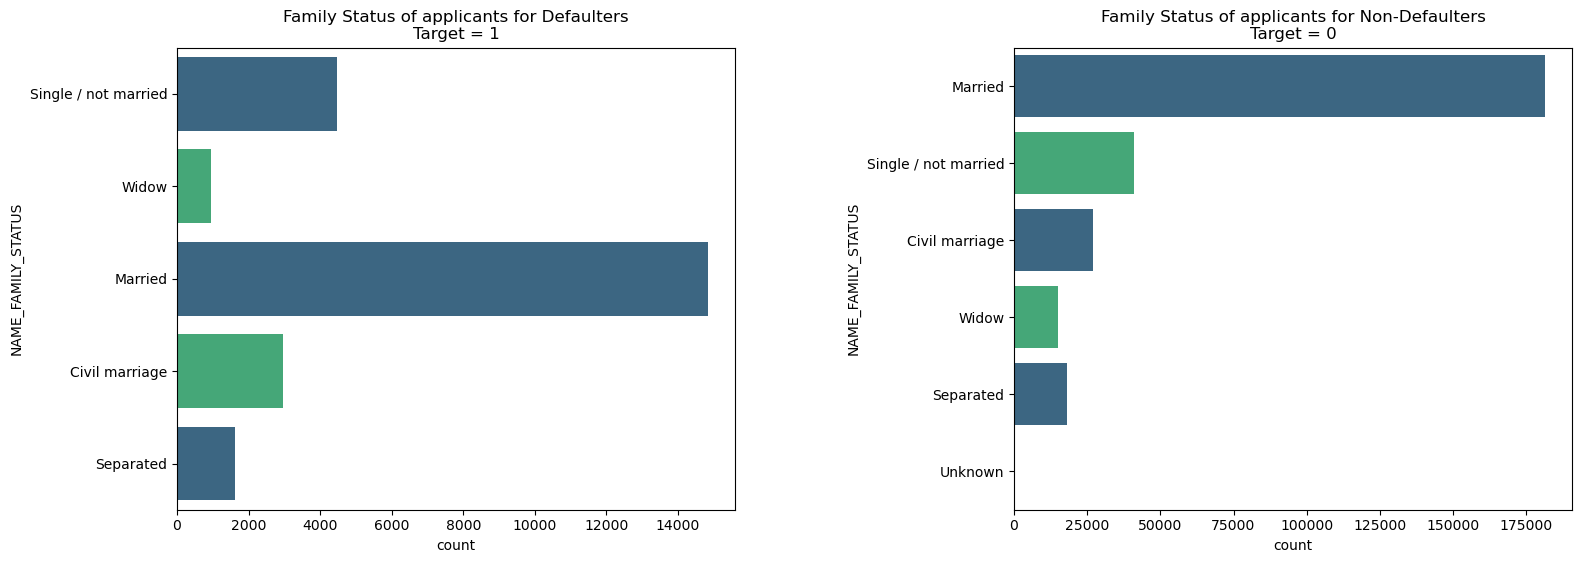

In [158]:
# Subplot showing Family Status of applicants for Defaulters and Non-Defaulters
plt.figure(figsize = [18,6])
plt.subplot(1,2,1)
palette = sns.color_palette("viridis", 2)
plt.title("Family Status of applicants for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_FAMILY_STATUS, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("viridis", 2)
plt.title("Family Status of applicants for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_FAMILY_STATUS, palette=palette)
plt.show()

**Observations**
-  Most of the the applicants are married

-  2nd highest applicants are Single/Non-married

-  Most of the the applicants are married in both defaulter and non-defaulter categories

-  Secondly many of the the applicants are Single/Non-married in both defaulter and non-defaulter categories

In [159]:
### Target Variable - "Flag Own Car" ###

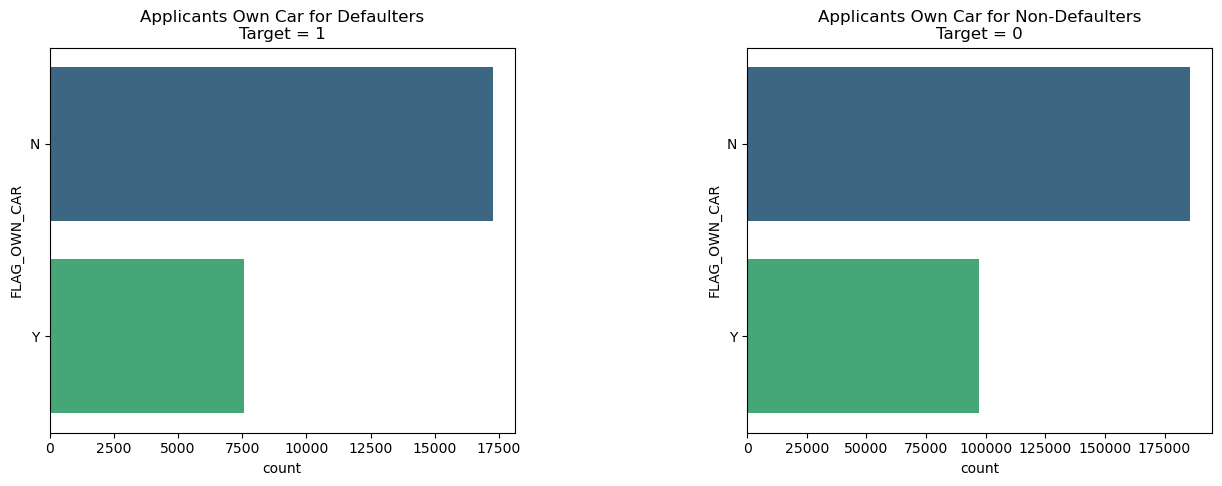

In [161]:
# Subplot showing "Applicants Own Car for Defaulters and Non-Defaulter
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
palette = sns.color_palette("viridis", 2)
plt.title("Applicants Own Car for Defaulters\nTarget = 1")
sns.countplot(y = def_r.FLAG_OWN_CAR, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("viridis", 2)
plt.title("Applicants Own Car for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.FLAG_OWN_CAR, palette=palette)
plt.show()

**Observations**
-  Most of the the applicants don't own a car
-  It can be seen that people with cars contribute almost same to the non-defaulters and defaulters. We can conclude that the number of default of people having car is low compared to people who don't.

In [164]:
### Target Variable - Flag Own Realty ###

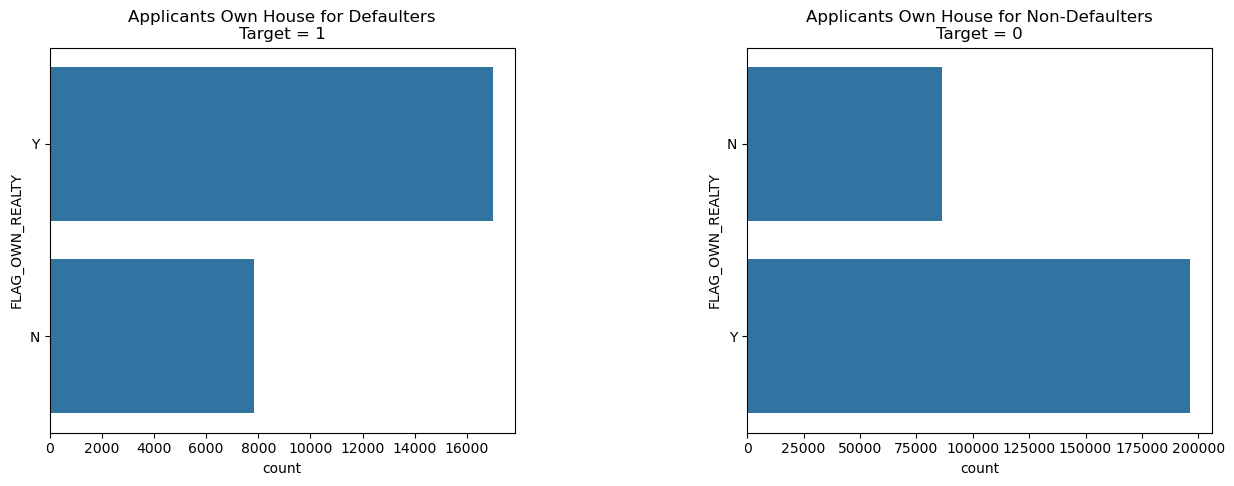

In [163]:
# Sub plot showing Applicants Own House for Defaulters and Non-Defaulters
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title("Applicants Own House for Defaulters\nTarget = 1")
sns.countplot(y = def_r.FLAG_OWN_REALTY)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Applicants Own House for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.FLAG_OWN_REALTY)
plt.show()

In [165]:
### Target Variable - Name Housing Type ###

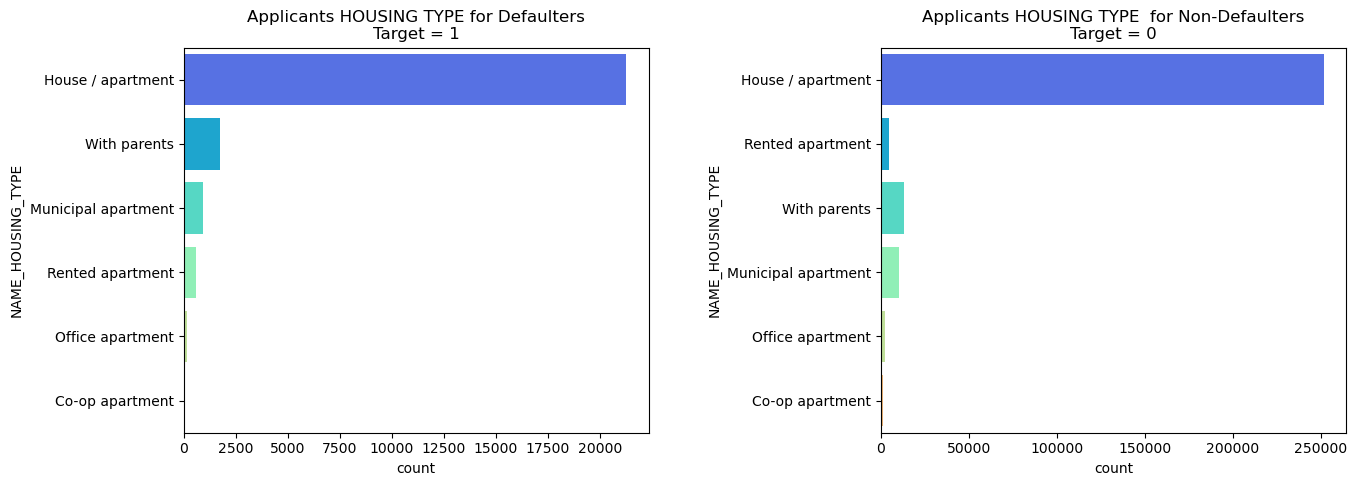

In [166]:
# Sub plot showing Applicants HOUSING TYPE for Defaulters and Non-Defaulters
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
palette = sns.color_palette("rainbow", 7)
plt.title("Applicants HOUSING TYPE for Defaulters\nTarget = 1")
sns.countplot(y = def_r.NAME_HOUSING_TYPE, palette=palette)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
palette = sns.color_palette("rainbow", 7)
plt.title("Applicants HOUSING TYPE  for Non-Defaulters\nTarget = 0")
sns.countplot(y = non_def.NAME_HOUSING_TYPE, palette=palette)
plt.show()

**Observations**
-  Most of the the applicants who own a house are non-defaulters and who don't own a house are defaulters. Its a very intresting trend here. We can say that applicants who own a house are tend to be non-defaulters

-  **Numerical variable Analysis**

In [176]:
### Target Variable - Total Population ###

In [177]:
data.REGION_POPULATION_RELATIVE.describe()

count   307511.00
mean         0.02
std          0.01
min          0.00
25%          0.01
50%          0.02
75%          0.03
max          0.07
Name: REGION_POPULATION_RELATIVE, dtype: float64

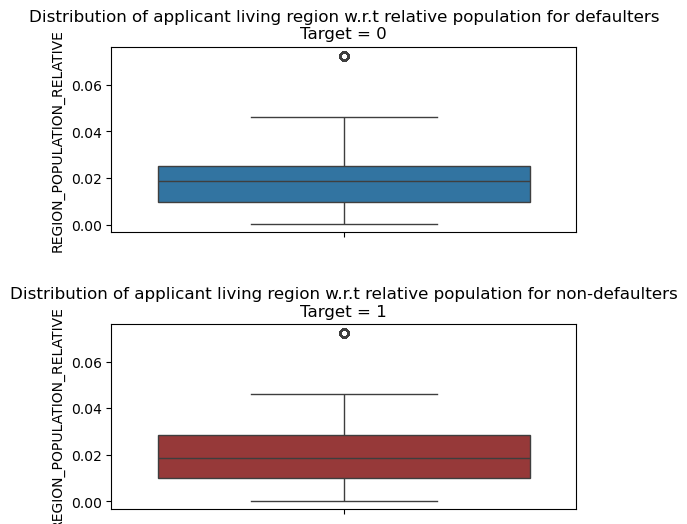

In [428]:
# Sub plot showing boxplot
plt.figure(figsize = [6, 6])

plt.subplot(2, 1, 1)
plt.title("Distribution of applicant living region w.r.t relative population for defaulters\nTarget = 0")
sns.boxplot(def_r.REGION_POPULATION_RELATIVE)


plt.subplots_adjust(hspace = 0.5)
plt.subplot(2, 1, 2)
plt.title("Distribution of applicant living region w.r.t relative population for non-defaulters\nTarget = 1")
sns.boxplot(non_def.REGION_POPULATION_RELATIVE, color = 'brown')
plt.show()

**Observations**
-  By looking at above box plot, we can see there is an outlier in this, which means one applicant is living in highly dense populated area
-  For all other applicants, the trend falls within IQR and mean & median are almost same. This means that most population is living in average to medium dense populated areas

In [186]:
###   Target Variable - Amount Credit  ###

In [187]:
data.AMT_CREDIT.describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

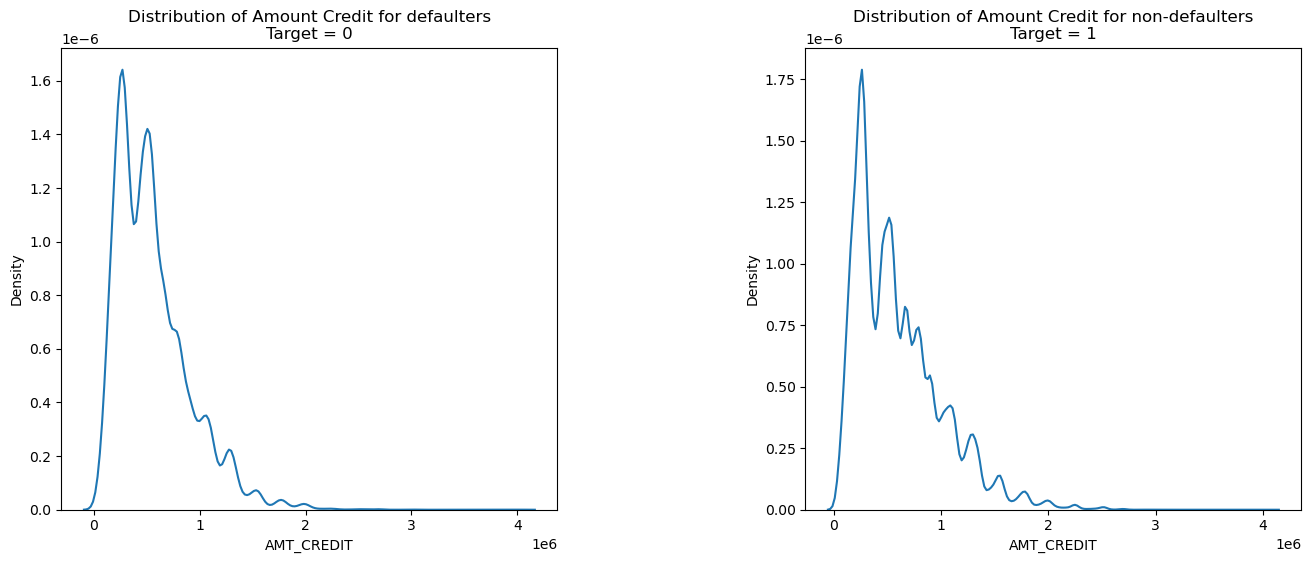

In [271]:
# Sub plot showing boxplot
plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)
plt.title("Distribution of Amount Credit for defaulters\nTarget = 0")
#sns.boxplot(def_r.AMT_CREDIT, color = 'Tomato')
sns.distplot(def_r['AMT_CREDIT'],hist=False)


plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 2)
plt.title("Distribution of Amount Credit for non-defaulters\nTarget = 1")
#sns.boxplot(non_def.AMT_CREDIT, color = 'cyan')
sns.distplot(non_def['AMT_CREDIT'],hist=False)
plt.show()

**Observations**
-  Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
-  Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

In [190]:
data[data.AMT_CREDIT > data.AMT_CREDIT.quantile(0.99)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,YEARS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,INCOME_GROUP,DEF_NOTDEF
189,100219,0,Cash loans,M,N,Y,1,315000.00,2250000.00,83515.50,2250000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.03,30.60,4.10,0.20,7.70,1,1,0,1,0,1,Core staff,3.00,1,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,2.50,0.00,0.00,0.00,0.00,0.00,3.00,"(28, 35]",Low Income(2.5-5L),NON-DEFAULTER
337,100389,0,Cash loans,M,Y,Y,0,247500.00,1971072.00,68643.00,1800000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.01,38.90,1.00,8.70,12.10,1,1,1,1,0,0,Core staff,2.00,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,6.60,0.00,0.00,0.00,0.00,0.00,1.00,"(35, 45]",Very Low Income(<2.5L),NON-DEFAULTER
341,100393,0,Cash loans,M,Y,Y,2,405000.00,2250000.00,59485.50,2250000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.01,41.00,16.90,2.60,13.60,1,1,0,1,1,0,Core staff,4.00,2,2,FRIDAY,13,0,0,0,0,0,0,Police,2.80,0.00,0.00,0.00,0.00,0.00,1.00,"(35, 45]",Low Income(2.5-5L),NON-DEFAULTER
441,100508,0,Cash loans,F,Y,Y,0,450000.00,1971072.00,62019.00,1800000.00,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.03,50.00,7.00,11.80,4.70,1,1,0,1,1,1,Managers,2.00,1,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,1.40,0.00,0.00,0.00,0.00,4.00,1.00,"(45, 50]",Low Income(2.5-5L),NON-DEFAULTER
485,100559,0,Cash loans,F,Y,Y,0,450000.00,2286211.50,116266.50,2182500.00,Unaccompanied,State servant,Higher education,Married,House / apartment,0.02,56.40,38.30,16.10,11.20,1,1,0,1,0,0,Core staff,2.00,2,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,7.30,NaN,NaN,NaN,NaN,NaN,NaN,"(50, 60]",Low Income(2.5-5L),NON-DEFAULTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.00,2032992.00,70794.00,1755000.00,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.07,54.70,10.00,15.50,9.30,1,1,0,1,0,0,Medicine staff,2.00,1,1,TUESDAY,13,0,0,0,0,0,0,Medicine,5.10,0.00,0.00,0.00,0.00,0.00,5.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
307095,455785,0,Cash loans,F,Y,Y,0,135000.00,2013840.00,53253.00,1800000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,55.60,1000.70,16.30,4.50,1,0,0,1,0,0,NaN,2.00,2,2,FRIDAY,9,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,3.00,1.00,2.00,"(50, 60]",Very Low Income(<2.5L),NON-DEFAULTER
307165,455868,0,Cash loans,F,Y,Y,0,337500.00,1890000.00,71986.50,1890000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.07,29.00,10.00,3.00,3.00,1,1,0,1,0,0,Accountants,2.00,1,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,1.90,0.00,0.00,0.00,0.00,1.00,4.00,"(28, 35]",Low Income(2.5-5L),NON-DEFAULTER
307214,455922,0,Cash loans,M,Y,N,2,256500.00,2290743.00,60556.50,2047500.00,"Spouse, partner",Commercial associate,Incomplete higher,Married,House / apartment,0.01,39.20,3.60,4.30,12.60,1,1,0,1,0,0,Managers,4.00,2,2,SATURDAY,12,0,0,0,0,0,0,Business Entity Type 3

**Observations**
-  We could see that there are some outliers at far extremes in Amount Credit variable. We therefore checked the value of 0.99 quantile to see the data imbalance.
-  Some applications are asking more relatively higher credits, but then we can observe that GOODS price also very close to the credit, so it justifies and the rows can be kept like that.
-  For all other applicants, the trend falls within IQR and mean & median are almost same. This means that most population is requesting credit somewhere between 2Lacs to 8Lacs

In [191]:
###  Target Variable - Amount Annuity  ###

In [192]:
data.AMT_ANNUITY.describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

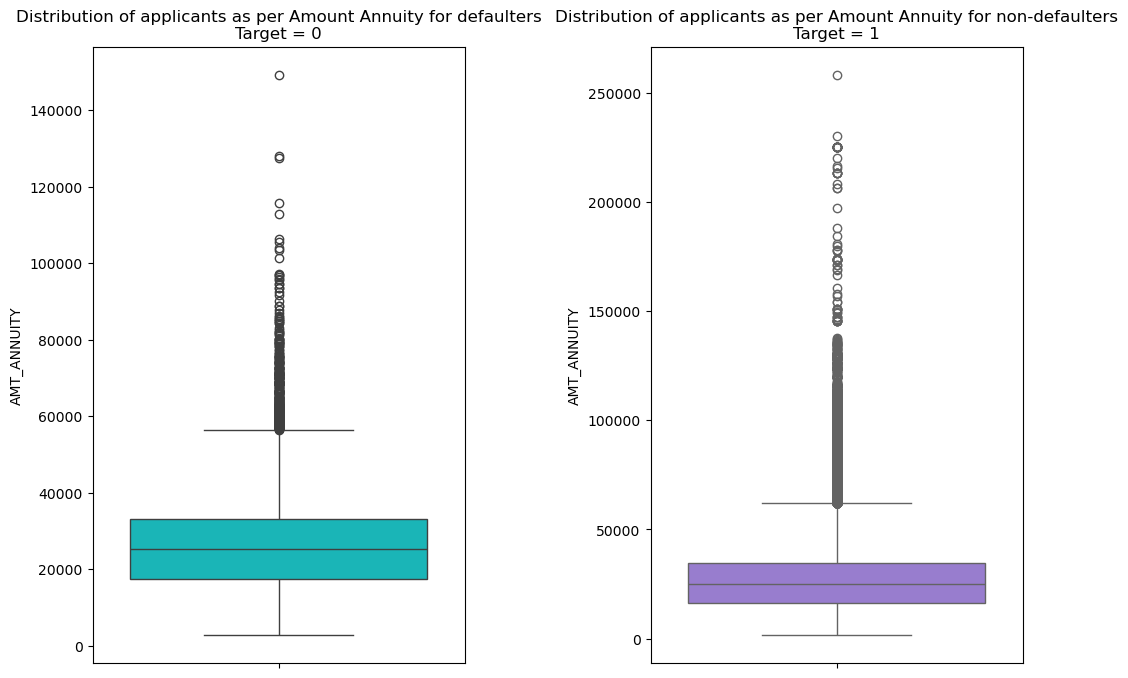

In [195]:
# Sub plot showing boxplot
plt.figure(figsize = [12, 8])

plt.subplot(1, 2, 1)
plt.title("Distribution of applicants as per Amount Annuity for defaulters\nTarget = 0")
sns.boxplot(def_r.AMT_ANNUITY, color = 'darkturquoise')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 2)
plt.title("Distribution of applicants as per Amount Annuity for non-defaulters\nTarget = 1")
sns.boxplot(non_def.AMT_ANNUITY, color = 'mediumpurple')
plt.show()

**Observations**
-  The disribution is same as AMT_CREDIT variable and therefore we can say the observations are also same as AMT_CREDIT variable. Amount annuity is proportional to amount credit

In [196]:
###  Target Variable - Amount Goods Price  ###

In [197]:
data.AMT_GOODS_PRICE.describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

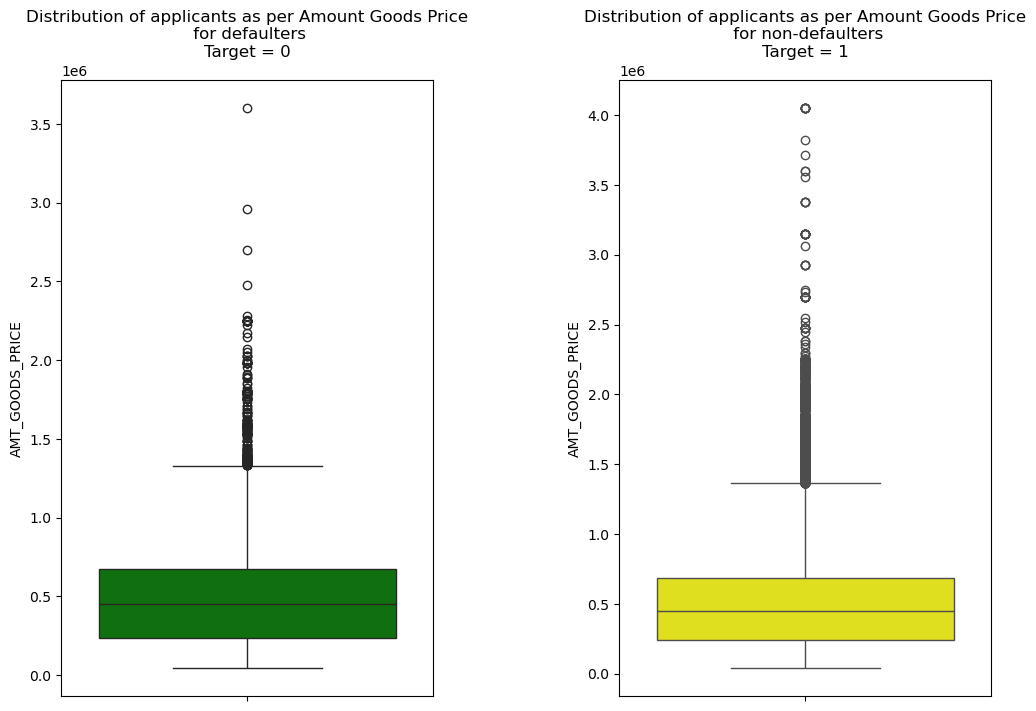

In [199]:
# Sub plot showing boxplot
plt.figure(figsize = [12, 8])

plt.subplot(1, 2, 1)
plt.title("Distribution of applicants as per Amount Goods Price\n for defaulters\nTarget = 0")
sns.boxplot(def_r.AMT_GOODS_PRICE, color = 'green')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 2)
plt.title("Distribution of applicants as per Amount Goods Price\n for non-defaulters\nTarget = 1")
sns.boxplot(non_def.AMT_GOODS_PRICE, color = 'yellow')
plt.show()

**Observations**
-  The disribution is same as AMT_CREDIT variable and therefore we can say the observations are also same as AMT_CREDIT variable. Good Amount is proportional to amount credit

In [ ]:
### Target Variable - Number of children the client has ###

In [200]:
data.CNT_CHILDREN.describe()

count   307511.00
mean         0.42
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64

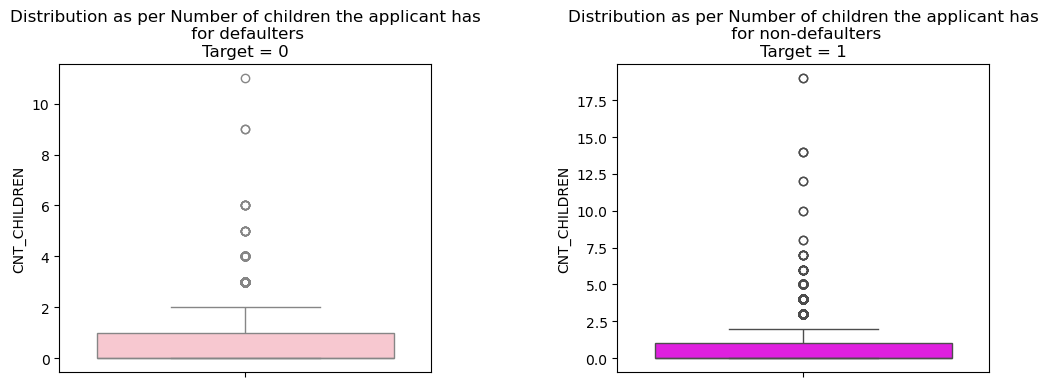

In [205]:
# Sub plot showing boxplot
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
plt.title("Distribution as per Number of children the applicant has\n for defaulters\nTarget = 0")
sns.boxplot(def_r.CNT_CHILDREN, color = 'pink')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1, 2, 2)
plt.title("Distribution as per Number of children the applicant has\n for non-defaulters\nTarget = 1")
sns.boxplot(non_def.CNT_CHILDREN, color = 'magenta')
plt.show()

**Observations**
-  It is observed that people with no children or max 1 children take maximum loans
-  Thre are applicants with more than 10 childrens and we can call them as outlier, buts for now we would leave them as it is

**Bivariate Analysis**

-  **Numerical v/s Numerical**

In [206]:
# Creating a dataframes with only useful nuemric variables to find correlation 
numeric_def = def_r[["TARGET", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_LAST_PHONE_CHANGE", "REGION_POPULATION_RELATIVE"]]
numeric_nondef = non_def[["TARGET", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE", "YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_LAST_PHONE_CHANGE", "REGION_POPULATION_RELATIVE"]]

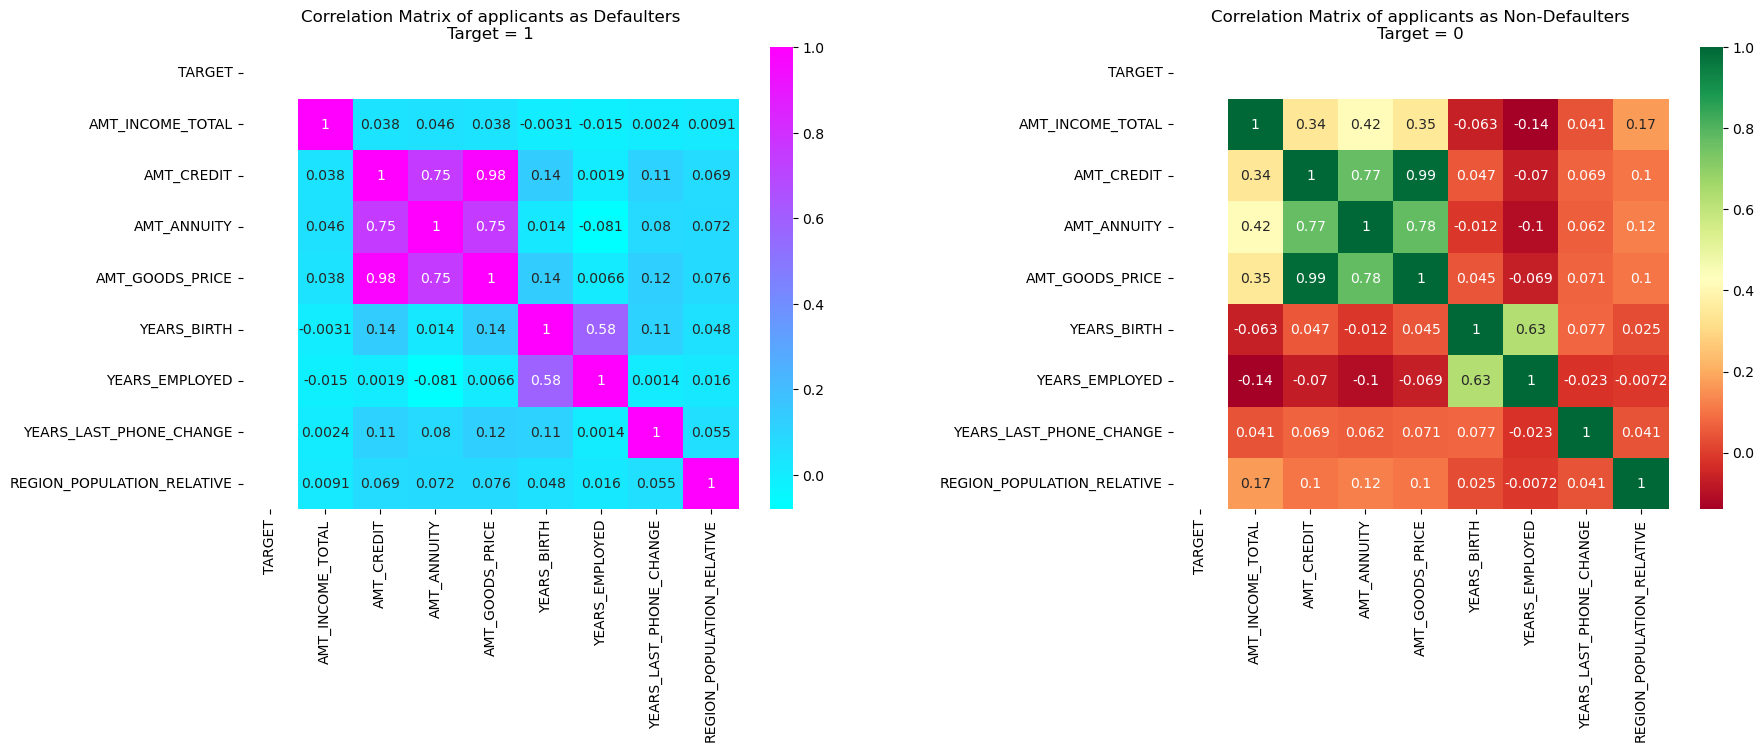

In [207]:
#Correlation Matrix of applicants as Defaulters and Non-Defaulters using heatmap
plt.figure(figsize = [20, 6])

plt.subplot(1,2,1)
plt.title("Correlation Matrix of applicants as Defaulters\nTarget = 1")
sns.heatmap(numeric_def.corr(), annot = True, cmap = 'cool')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Correlation Matrix of applicants as Non-Defaulters\nTarget = 0")
sns.heatmap(numeric_nondef.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

**Observations**

**Highly corelate columns for defaulters**

-  AMT_CREDIT and AMT_ANNUITY (0.74)
-  AMT_CREDIT and AMT_GOODS_PRICE (0.98)
-  AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

**Highly corelate columns for non defaulters**

-  AMT_CREDIT and AMT_ANNUITY (0.76)
-  AMT_CREDIT and AMT_GOODS_PRICE (0.98)
-  AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Conclusion**
-  Through this correalation ,using heatmap. We can conclude that correaltions are almost same while seeing Target 0 & 1


In [208]:
### Target Variables - "AMT_INCOME_TOTAL" and "YEARS_EMPLOYED"  ###

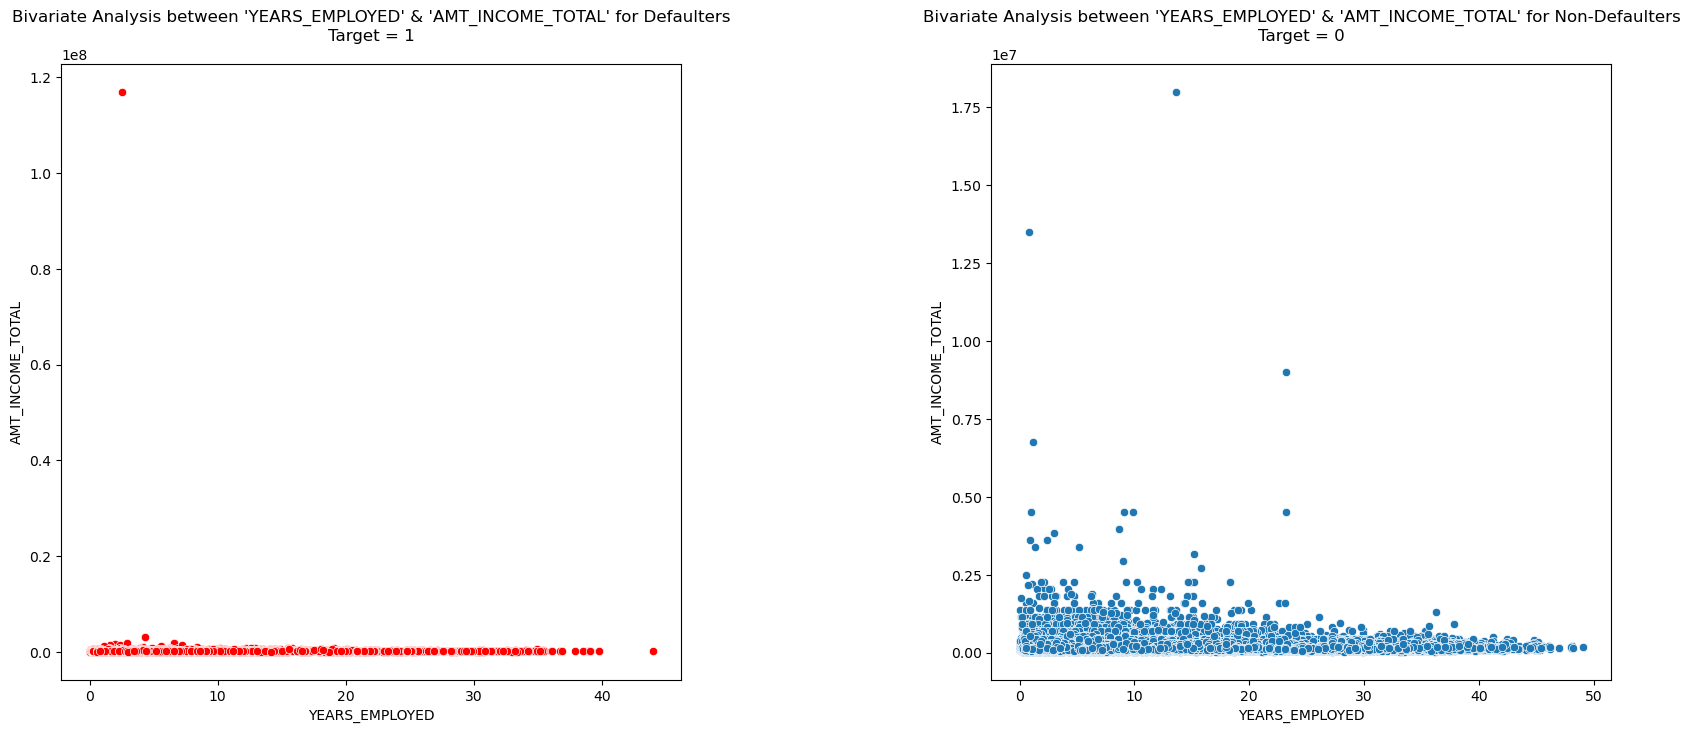

In [210]:
# Scatter plot showing Bivariate Analysis between 'YEARS_EMPLOYED' & 'AMT_INCOME_TOTAL' for Defaulters Non-Defaulters
plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'YEARS_EMPLOYED' & 'AMT_INCOME_TOTAL' for Defaulters\nTarget = 1")
sns.scatterplot(x = 'YEARS_EMPLOYED', y = 'AMT_INCOME_TOTAL', data = def_r[def_r['YEARS_EMPLOYED'] < 1000], color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'YEARS_EMPLOYED' & 'AMT_INCOME_TOTAL' for Non-Defaulters\nTarget = 0")
sns.scatterplot(x = 'YEARS_EMPLOYED', y = 'AMT_INCOME_TOTAL', data = non_def[non_def['YEARS_EMPLOYED'] < 1000])
plt.show()

**Observations**
-  It is quite evident from above plots that most of the defaulters have very low income regardless of their duration of employment in years.
-  However, we can see that non defaulters have comparatively higher incomes than defaulters and also it can be seen that total income is gradually reducing with increase in years of employment

In [211]:
### Target Variables - "AMT_CREDIT" and "AMT_GOODS_PRICE"  ###

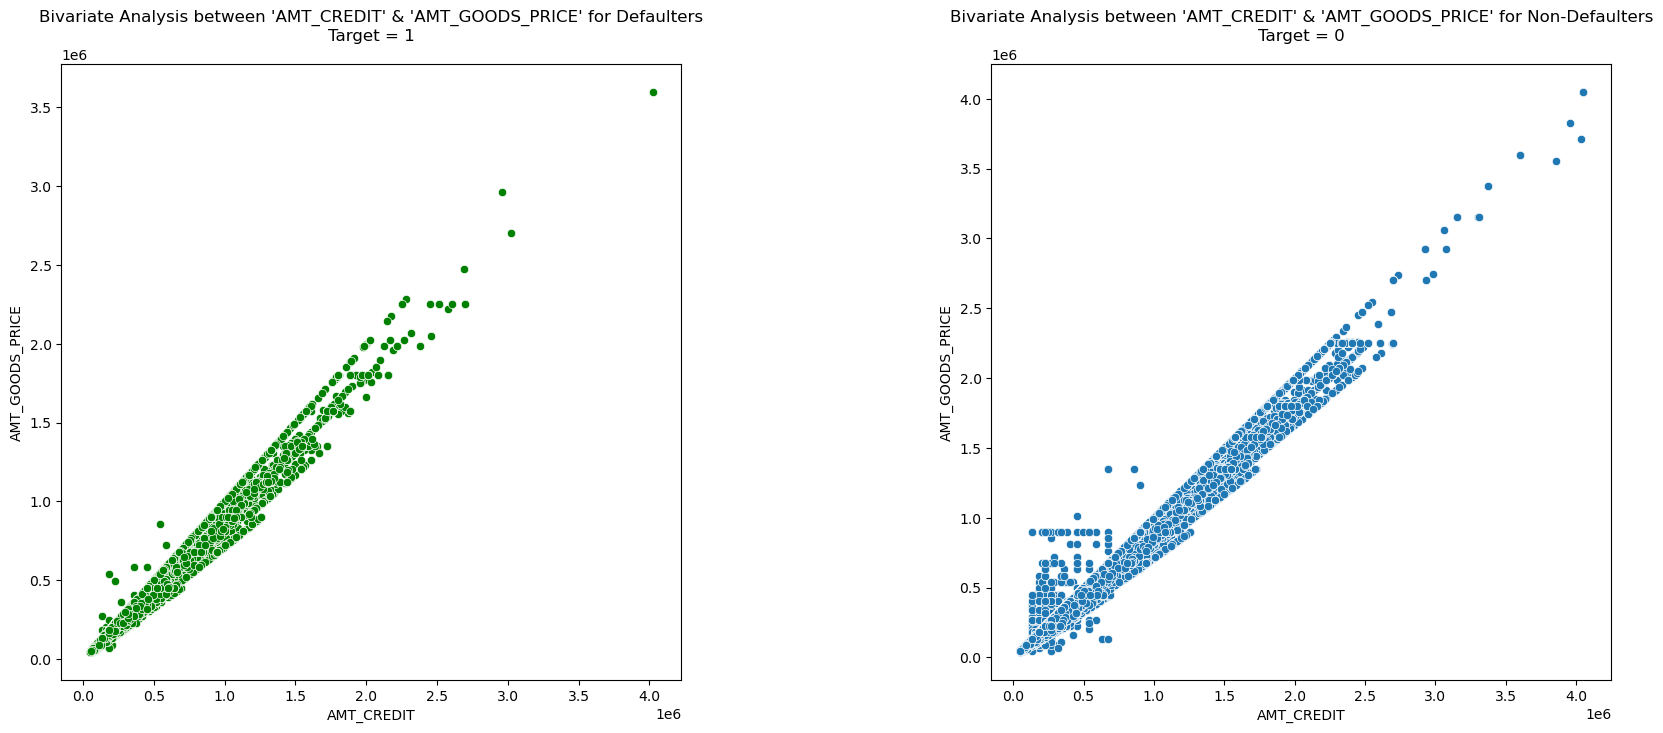

In [214]:
# Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters and Non-Defaulters using scatter plot
plt.figure(figsize = [20, 8])

plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Defaulters\nTarget = 1")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = def_r, color = 'green')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_GOODS_PRICE' for Non-Defaulters\nTarget = 0")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = non_def)
plt.show()

**Observations**
-  Amount Credit and Amount of Good price are showing same trend and which is mostly true as credit amount may be same or less than goods price

In [215]:
### Target Variables - "AMT_CREDIT" and "AMT_ANNUITY"   ###

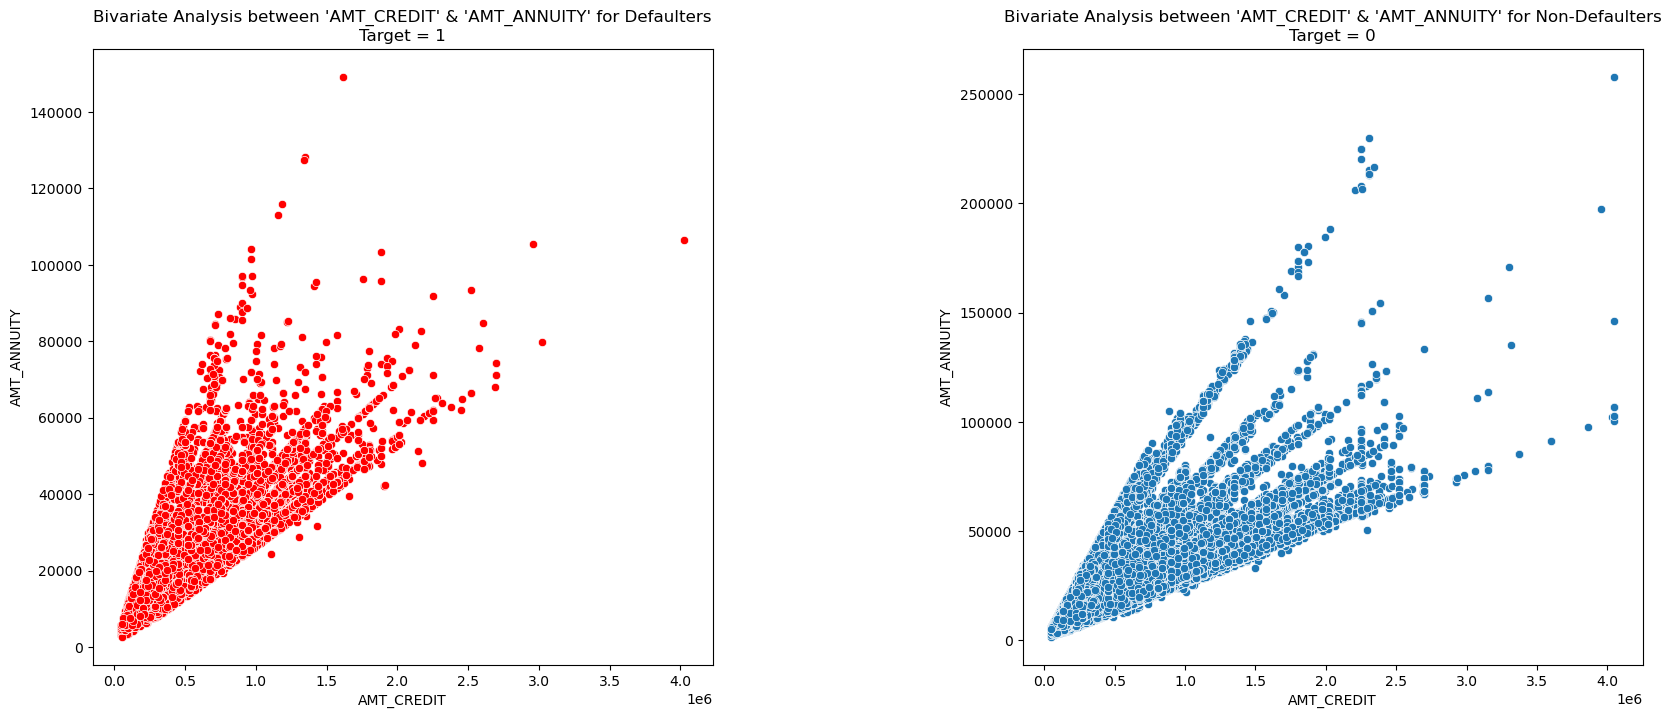

In [216]:
# Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters and Non-Defaulters using scatter plot
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Defaulters\nTarget = 1")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = def_r, color = 'red')

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.title("Bivariate Analysis between 'AMT_CREDIT' & 'AMT_ANNUITY' for Non-Defaulters\nTarget = 0")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = non_def)
plt.show()

**Observations**
-  Amount Credit and Amount Annuity are showing same trend

-  **Categorical v/s Numerical**

In [220]:
### Target Variables - "AMT_CREDIT" and "INCOME_GROUP"  ###

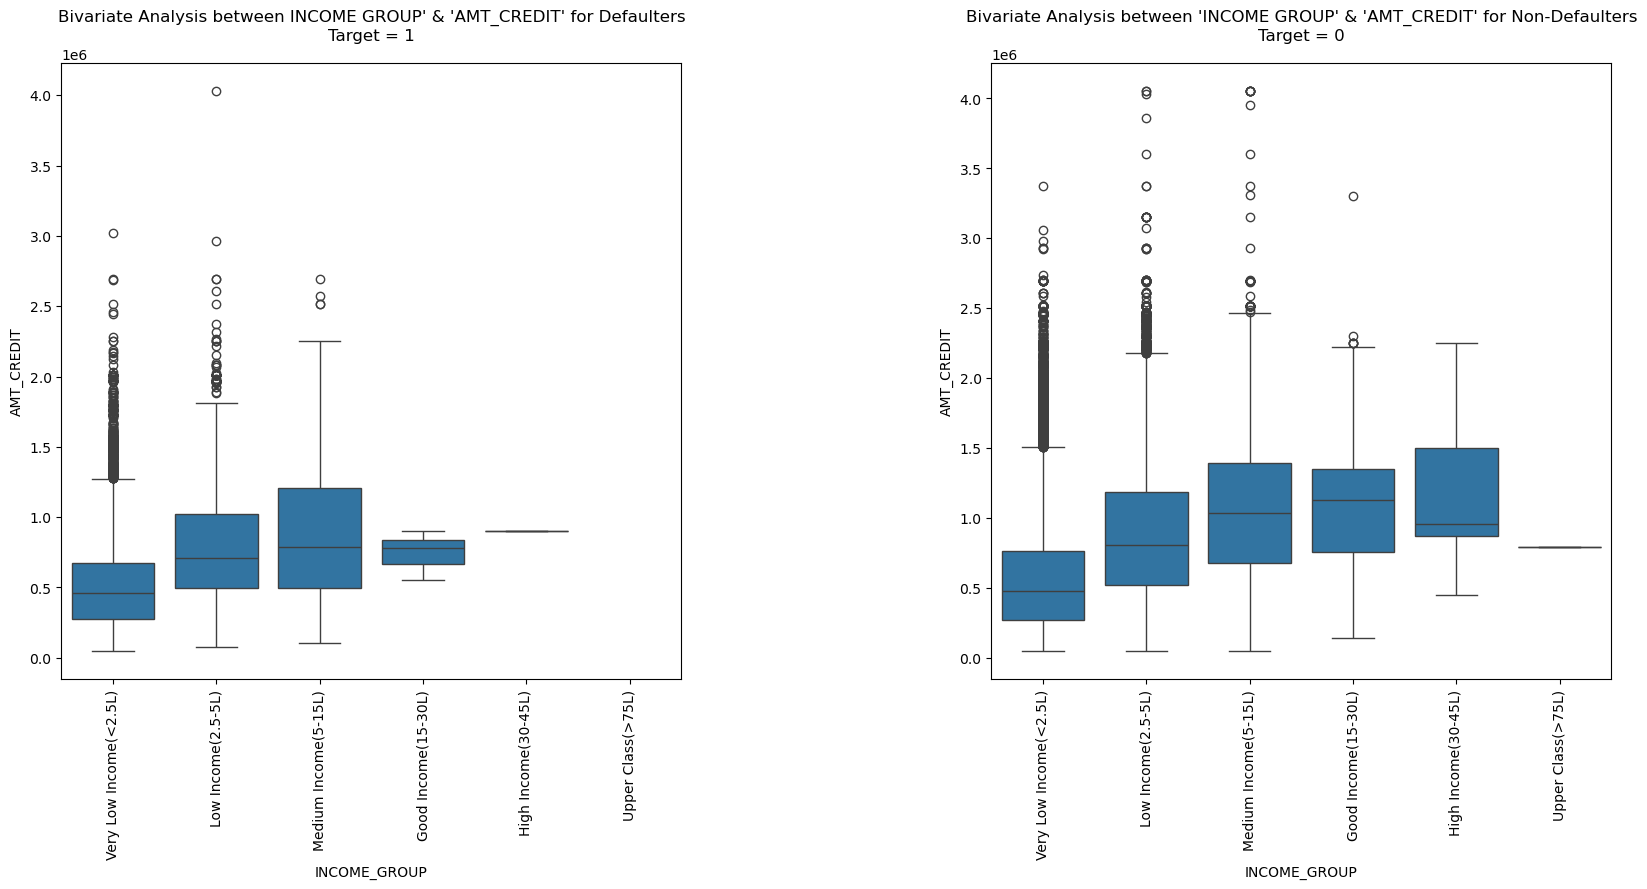

In [225]:
# Bivariate Analysis between INCOME GROUP' & 'AMT_CREDIT' for Defaulters and Non-Defaulters using boxplot
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Bivariate Analysis between INCOME GROUP' & 'AMT_CREDIT' for Defaulters\nTarget = 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = def_r)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Bivariate Analysis between 'INCOME GROUP' & 'AMT_CREDIT' for Non-Defaulters\nTarget = 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = non_def)
plt.show()

**Observations**
-  We can infer that though the maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too. The loan book of the financial institution can get affected due to higher amount not being paid back.

In [233]:
### Target Variables - "AMT_CREDIT" & "NAME_EDUCATION" ###

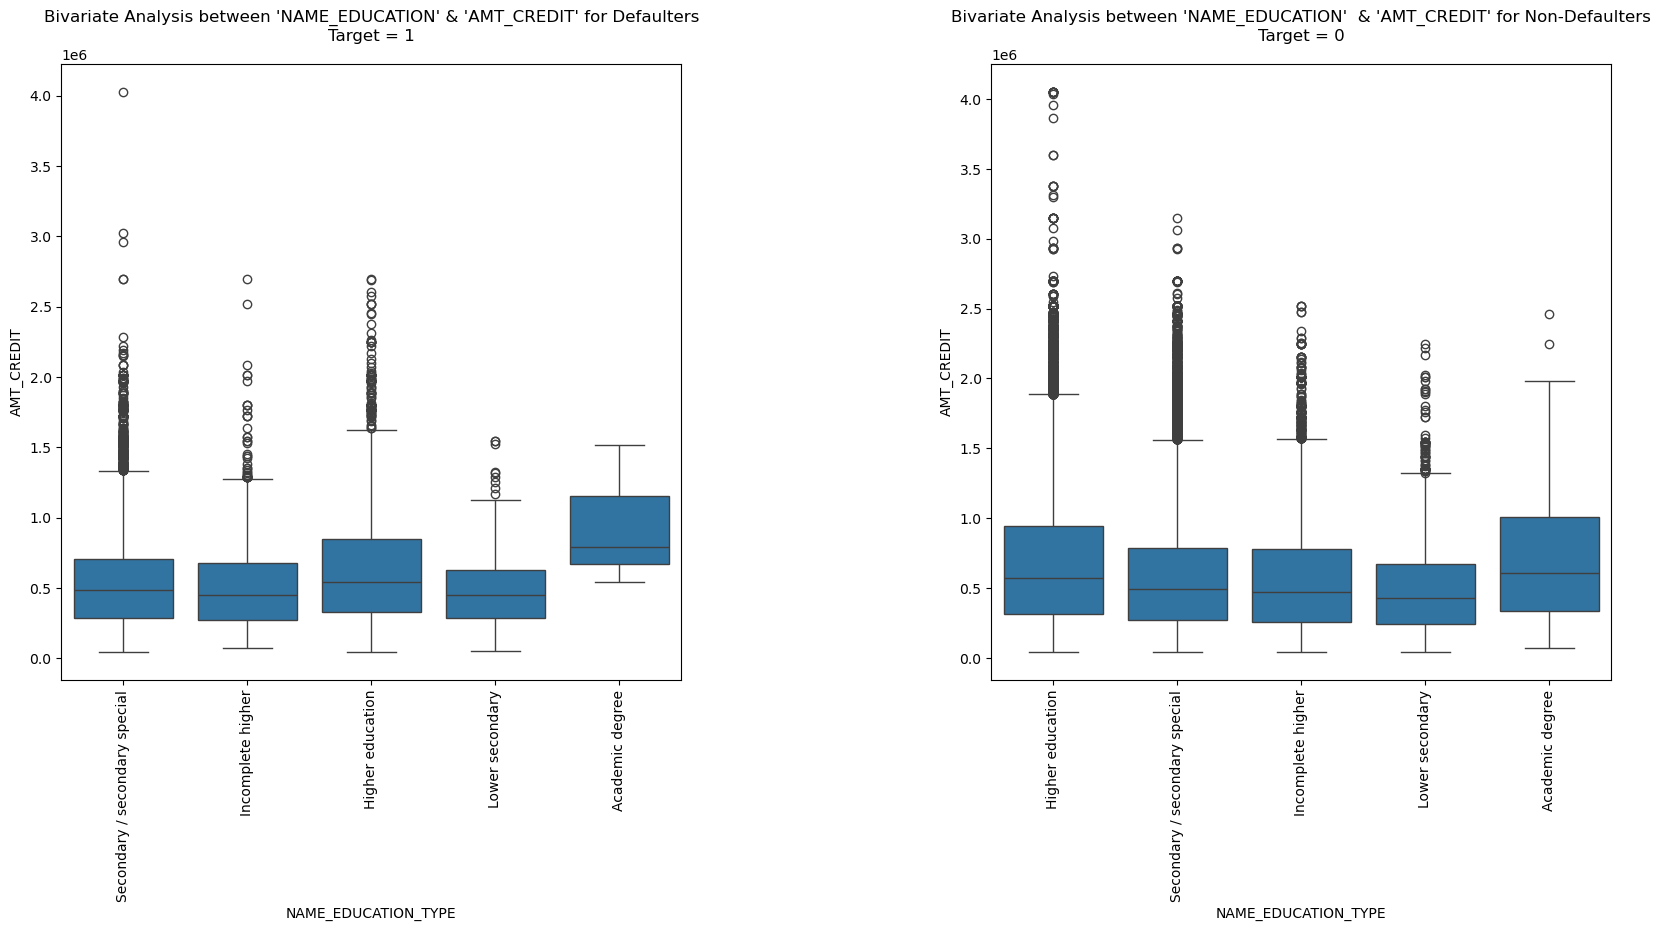

In [234]:
# Bivariate Analysis between 'NAME_EDUCATION' & 'AMT_CREDIT' for Defaulters and Non-Defaulters using box plot
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.xticks(rotation=90)
plt.title("Bivariate Analysis between 'NAME_EDUCATION' & 'AMT_CREDIT' for Defaulters\nTarget = 1")
sns.boxplot(x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT', data = def_r)

plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
plt.title("Bivariate Analysis between 'NAME_EDUCATION'  & 'AMT_CREDIT' for Non-Defaulters\nTarget = 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE' , y = 'AMT_CREDIT', data = non_def)
plt.show()

**Observations**
-  Here the trend looks almost same, median is high for academic degree holders in both cases. Rest all looks almost same

**Anslysis of two segmented variables**

-  **Income group and gender**

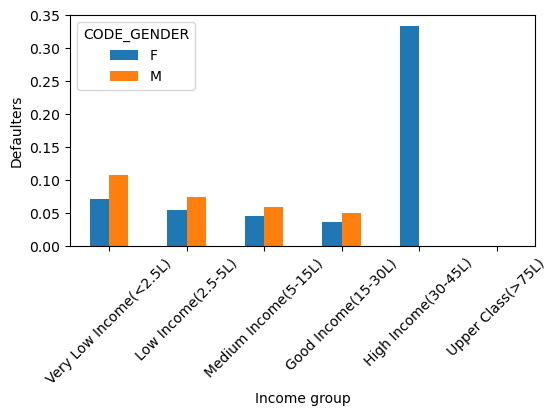

In [432]:
data.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,3),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')
plt.show()

**Observations**
We can see that Males are more likely defaulted than Females accross all income groups.

-  **Education and gender**

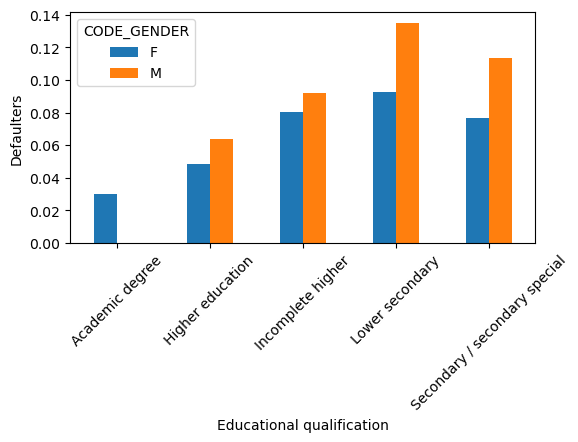

In [433]:
data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,3),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')
plt.show()

**Observations**
-  Lower secondary educated clients are more defaulted followed by Secondary and Incomplete higher educated clients.
-  The Higher educated people are less defaulted.
-  Accross all educated level Females are less defaulted than male.

-  **Age group and Income group**

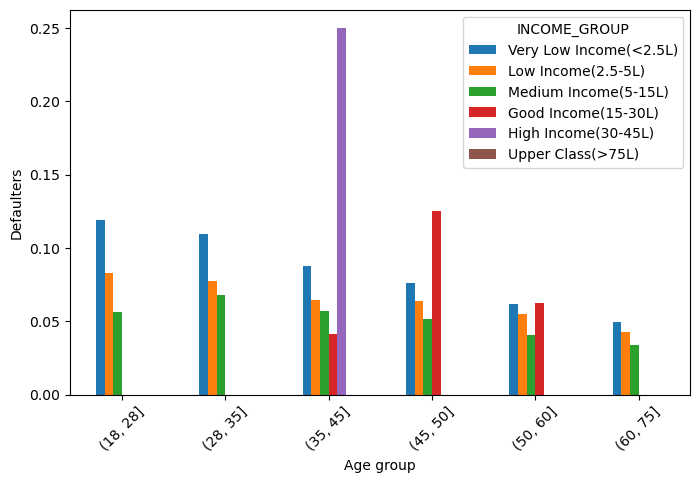

In [292]:
data.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')
plt.show()

**Observations**
-  Young clients are more defaulted than Mid age and senior.
-  Young low income people are more defaulted.
-  For Mid age and senior people the default rate is almost same in all income group.

-  **Profession and Gender**

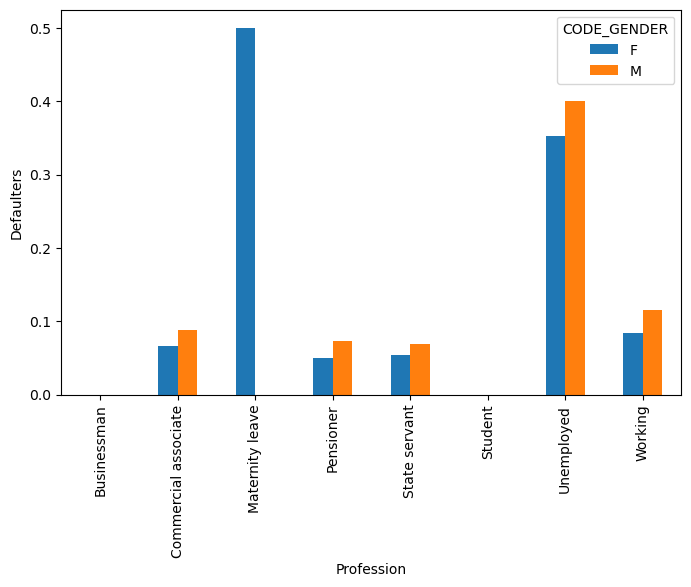

In [294]:
data.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')
plt.show()

**Observations**
-  No surprise the unemployed clients are more defaulted.
-  Clients with maternity leave are expected to be defaulted more.
-  The default rate is lesser in all other professions.
-  Males are more defaulted with their respective professions compared to females.

**Read Previous application**

In [330]:
# Read another file 'previous_application.csv'
prev_data = pd.read_csv("previous_application.csv")

In [331]:
# Print the head of file 
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
prev_data.shape

(1670214, 37)

In [333]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Handling Missing values**

In [334]:
# Calculate percentage of null values using mean 
100*prev_data.isnull().mean()

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

-  Replacing all the XNA and XAP to np.null Because looks like these values entered in the application as blank or may be not applicable.

In [335]:
prev_data.replace('XNA',np.nan,inplace=True)
prev_data.replace('XAP',np.nan,inplace=True)

In [336]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (prev_data.columns[(round(100*(prev_data.isnull().sum()/len(prev_data.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [337]:
# Delete the columns having more than 30% missing values
prev_data = prev_data.drop(cols_30_percent_missing_values,axis=1)

-  List and delete the columns, which are not much relevant for the analysis

In [338]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [339]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [340]:
# Delete the columns which are irrelevant for the analysis
prev_data = prev_data.drop(cols_irrelevant,axis=1)

In [341]:
prev_data.shape

(1670214, 15)

-  **Treating Missing Values in Rows**

In [342]:
# Percent of missing values in columns
(round(100*(prev_data.isnull().sum()/len(prev_data.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.02
AMT_ANNUITY            22.29
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE        23.08
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.12
NAME_PORTFOLIO         22.29
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64

In [343]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(prev_data[np.isnan(prev_data['AMT_ANNUITY']) & np.isnan(prev_data['CNT_PAYMENT']) & np.isnan(prev_data['AMT_GOODS_PRICE'])])

333855

As there are only 333855 such records we can delete those. Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis. It is better to delete such rows instead of imputing values and making the analysis biased.

In [344]:
prev_data = prev_data[(~(np.isnan(prev_data['AMT_ANNUITY']) & np.isnan(prev_data['AMT_GOODS_PRICE']) & np.isnan(prev_data['CNT_PAYMENT'])))]

In [345]:
prev_data.shape

(1336359, 15)

In [346]:
(round(100*(prev_data.isnull().sum()/len(prev_data.index)),2))

SK_ID_PREV             0.00
SK_ID_CURR             0.00
NAME_CONTRACT_TYPE     0.00
AMT_ANNUITY            2.87
AMT_APPLICATION        0.00
AMT_CREDIT             0.00
AMT_GOODS_PRICE        3.87
NAME_CONTRACT_STATUS   0.00
DAYS_DECISION          0.00
NAME_CLIENT_TYPE       0.07
NAME_PORTFOLIO         2.87
CHANNEL_TYPE           0.00
SELLERPLACE_AREA       0.00
CNT_PAYMENT            2.87
PRODUCT_COMBINATION    0.00
dtype: float64

In [347]:
# Count the rows for which AMT_ANNUITY is empty
len(prev_data[np.isnan(prev_data['AMT_ANNUITY'])])

38380

In [348]:
# As there are only 38380 rows we can delte those records
prev_data = prev_data[~(np.isnan(prev_data['AMT_ANNUITY']))]

In [349]:
prev_data.shape

(1297979, 15)

In [350]:
(round(100*(prev_data.isnull().sum()/len(prev_data.index)),2))   (1242076, 15)

SK_ID_PREV             0.00
SK_ID_CURR             0.00
NAME_CONTRACT_TYPE     0.00
AMT_ANNUITY            0.00
AMT_APPLICATION        0.00
AMT_CREDIT             0.00
AMT_GOODS_PRICE        3.98
NAME_CONTRACT_STATUS   0.00
DAYS_DECISION          0.00
NAME_CLIENT_TYPE       0.07
NAME_PORTFOLIO         0.00
CHANNEL_TYPE           0.00
SELLERPLACE_AREA       0.00
CNT_PAYMENT            0.00
PRODUCT_COMBINATION    0.00
dtype: float64

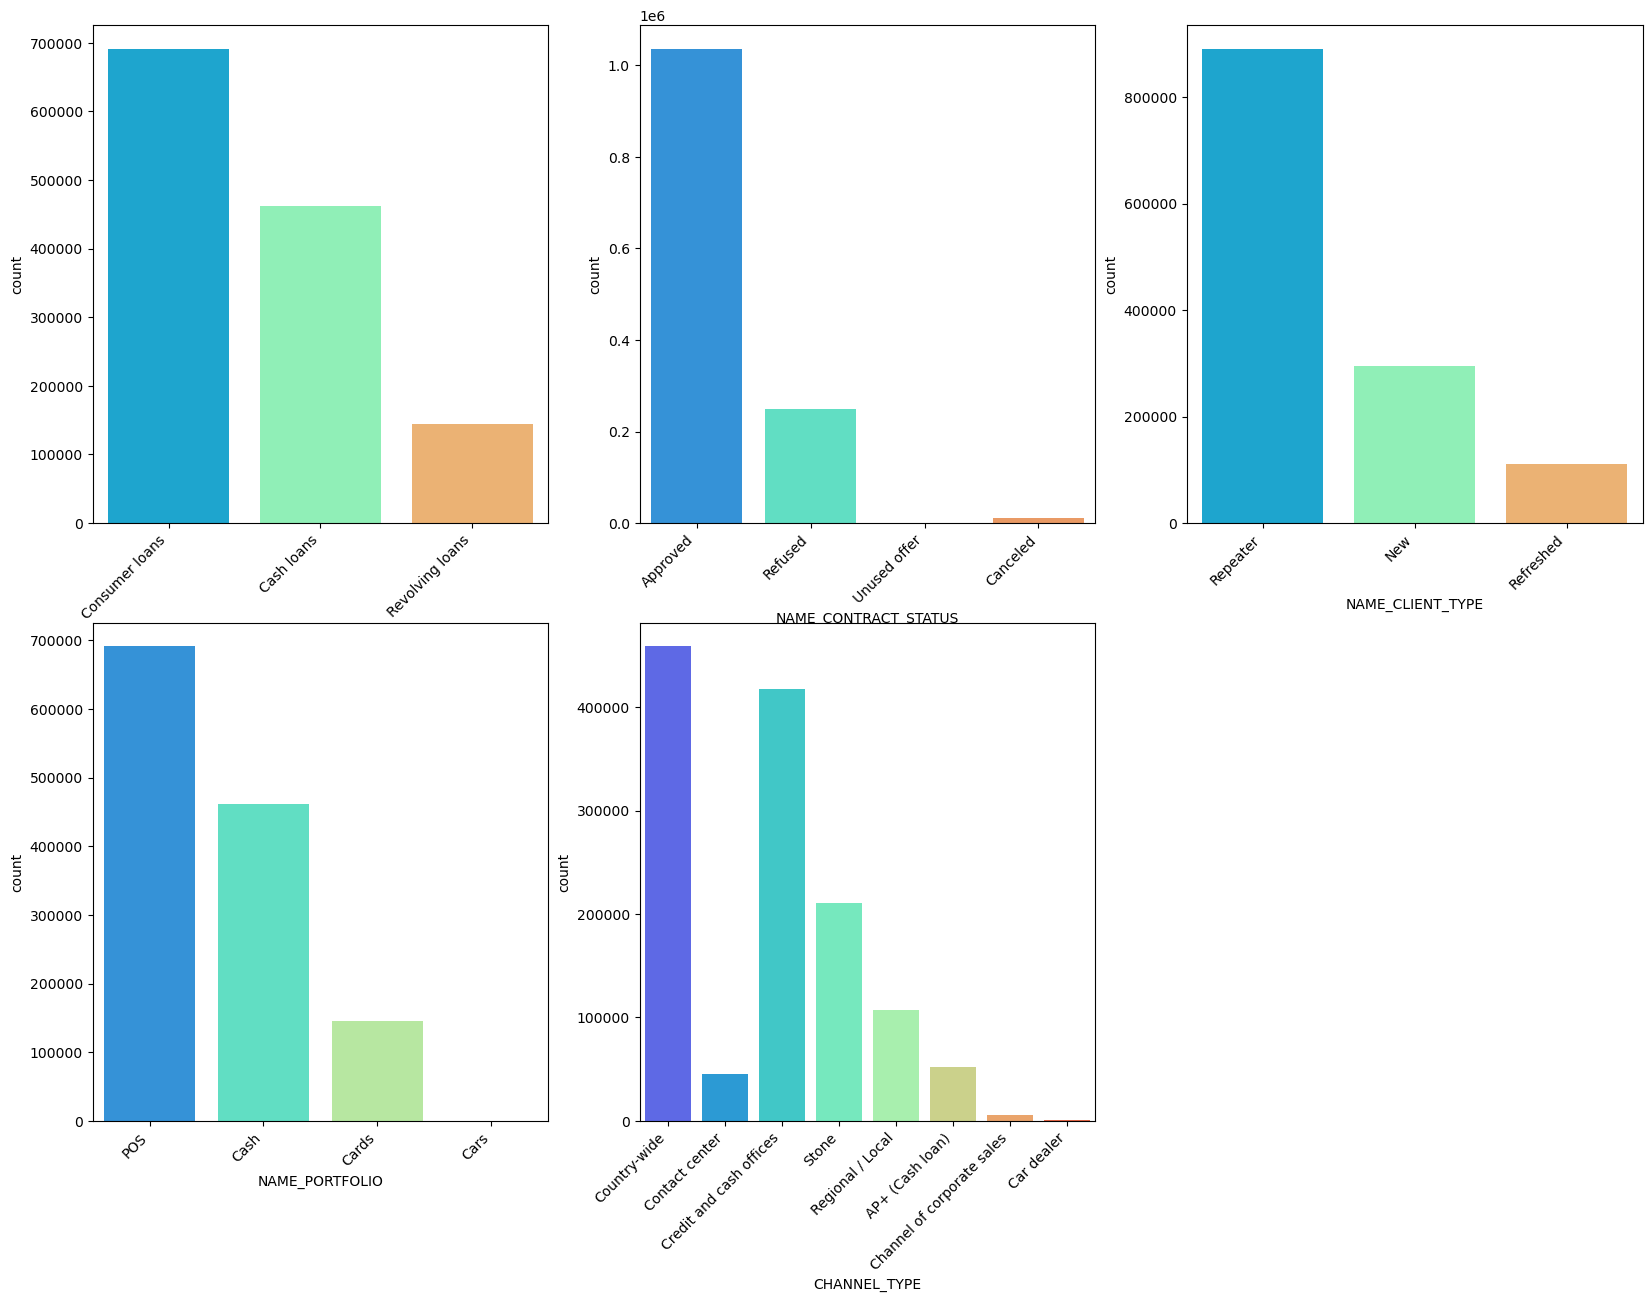

In [372]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = prev_data, palette="rainbow")
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

We can see that there is data imbalance in below columns:-

-  NAME_CONTRACT_TYPE - There are veru few Revolving Loans
-  NAME_CONTRACT_STATUS - There are very few Refused loans. Almost negligible Canceled loans.
-  NAME_CLIENT_TYPE - There are very few New applicant. Even fewer Refreshed applicants.
-  NAME_PORTFOLIO - Very few application for Cards and Cars
-  CHANNEL_TYPE - Except Country-Wide, Credit and Cash offices and Stone all other channels are very few in muber.

**Converting DAYS_DECISION column into MONTH_DECISION column for readablity and analysis**

In [355]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
prev_data['MONTH_DECISION'] = abs(prev_data['DAYS_DECISION']//30)

In [356]:
# Drop 'DAYS_DECISION' column
prev_data = prev_data.drop(['DAYS_DECISION'],axis=1)

In [357]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,PRODUCT_COMBINATION,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,Approved,Repeater,POS,Country-wide,35,12.00,POS mobile with interest,3
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,Approved,Repeater,Cash,Contact center,-1,36.00,Cash X-Sell: low,6
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,Approved,Repeater,Cash,Credit and cash offices,-1,12.00,Cash X-Sell: high,11
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,Approved,Repeater,Cash,Credit and cash offices,-1,12.00,Cash X-Sell: middle,18
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,Refused,Repeater,Cash,Credit and cash offices,-1,24.00,Cash Street: high,27


In [358]:
prev_data.shape

(1297979, 15)

**Merging Current application and Previous application dataset**

In [359]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP']

In [360]:
# Creating a dataset from current application for merging 
data_to_merge = data[cols_current]
data_to_merge.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,100002,1,M,Secondary / secondary special,Single / not married,"(18, 28]",Very Low Income(<2.5L)
1,100003,0,F,Higher education,Married,"(45, 50]",Low Income(2.5-5L)
2,100004,0,M,Secondary / secondary special,Single / not married,"(50, 60]",Very Low Income(<2.5L)
3,100006,0,F,Secondary / secondary special,Civil marriage,"(50, 60]",Very Low Income(<2.5L)
4,100007,0,M,Secondary / secondary special,Single / not married,"(50, 60]",Very Low Income(<2.5L)


In [361]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [362]:
# Creating  a dataset from previous application for merging
prev_to_merge = prev_data.drop(cols_prev_to_drop,axis=1)
prev_to_merge.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,Approved,Repeater,POS,Country-wide,12.00,3
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,Approved,Repeater,Cash,Contact center,36.00,6
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,Approved,Repeater,Cash,Credit and cash offices,12.00,11
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,Approved,Repeater,Cash,Credit and cash offices,12.00,18
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,Refused,Repeater,Cash,Credit and cash offices,24.00,27


In [363]:
# Merging both the datasets
df_merged = pd.merge(prev_to_merge,data_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,Approved,Repeater,POS,Country-wide,12.00,3,0.00,F,Incomplete higher,Married,"(35, 45]",Very Low Income(<2.5L)
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,Approved,Repeater,Cash,Contact center,36.00,6,0.00,F,Secondary / secondary special,Civil marriage,"(50, 60]",Very Low Income(<2.5L)
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,Approved,Repeater,Cash,Credit and cash offices,12.00,11,0.00,F,Secondary / secondary special,Married,"(28, 35]",Very Low Income(<2.5L)
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,Approved,Repeater,Cash,Credit and cash offices,12.00,18,0.00,M,Secondary / secondary special,Married,"(60, 75]",Low Income(2.5-5L)
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,Refused,Repeater,Cash,Credit and cash offices,24.00,27,0.00,F,Secondary / secondary special,Married,"(18, 28]",Very Low Income(<2.5L)


In [364]:
df_merged.shape

(1297979, 18)

In [365]:
len(df_merged[np.isnan(df_merged['TARGET'])])

191496

We can see that there are NaN values in the current application columns in the merged datasets. Because few SK_ID_CURR are present in the previous application dataset, but those IDs are not present in the current application dataset. Eg:- SK_ID_CURR == 176158 is present in the previous application but not in present. We will remove those such records.

In [366]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]    

In [367]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [368]:
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,Approved,Repeater,POS,Country-wide,12.00,3,0,F,Incomplete higher,Married,"(35, 45]",Very Low Income(<2.5L)
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,Approved,Repeater,Cash,Contact center,36.00,6,0,F,Secondary / secondary special,Civil marriage,"(50, 60]",Very Low Income(<2.5L)
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,Approved,Repeater,Cash,Credit and cash offices,12.00,11,0,F,Secondary / secondary special,Married,"(28, 35]",Very Low Income(<2.5L)
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,Approved,Repeater,Cash,Credit and cash offices,12.00,18,0,M,Secondary / secondary special,Married,"(60, 75]",Low Income(2.5-5L)
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,Refused,Repeater,Cash,Credit and cash offices,24.00,27,0,F,Secondary / secondary special,Married,"(18, 28]",Very Low Income(<2.5L)


We can create a new derived column for what percentage of the applied amount was credited for each client. Derived column name :- PERCENT_CREDIT

In [369]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,MONTH_DECISION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AGE_GROUP,INCOME_GROUP,PERCENT_CREDIT
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,Approved,Repeater,POS,Country-wide,12.00,3,0,F,Incomplete higher,Married,"(35, 45]",Very Low Income(<2.5L),100.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,Approved,Repeater,Cash,Contact center,36.00,6,0,F,Secondary / secondary special,Civil marriage,"(50, 60]",Very Low Income(<2.5L),111.88
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,Approved,Repeater,Cash,Credit and cash offices,12.00,11,0,F,Secondary / secondary special,Married,"(28, 35]",Very Low Income(<2.5L),121.28
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,Approved,Repeater,Cash,Credit and cash offices,12.00,18,0,M,Secondary / secondary special,Married,"(60, 75]",Low Income(2.5-5L),104.62
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,Refused,Repeater,Cash,Credit and cash offices,24.00,27,0,F,Secondary / secondary special,Married,"(18, 28]",Very Low Income(<2.5L),119.72


**Univariate analysis on unordered categorical variable**

-  **Previous Loan status**

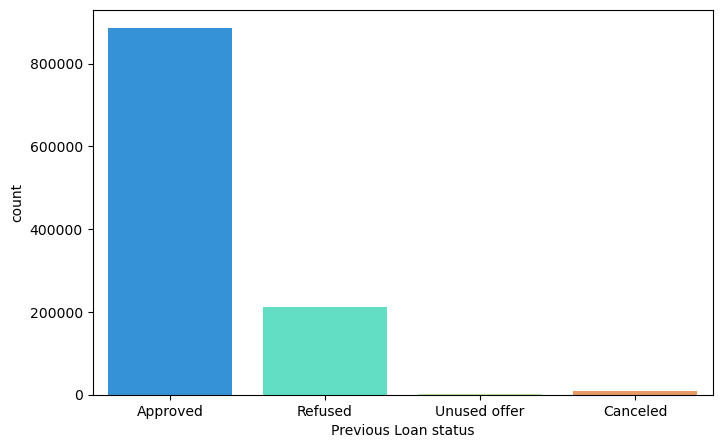

In [434]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged, palette="rainbow")
ax.set(xlabel='Previous Loan status')
plt.show()

**Observations**
-  There are huge number of Approved loan than Refused. Hardly, there are any Canceled or Unused offer loan.

-  **Client type**

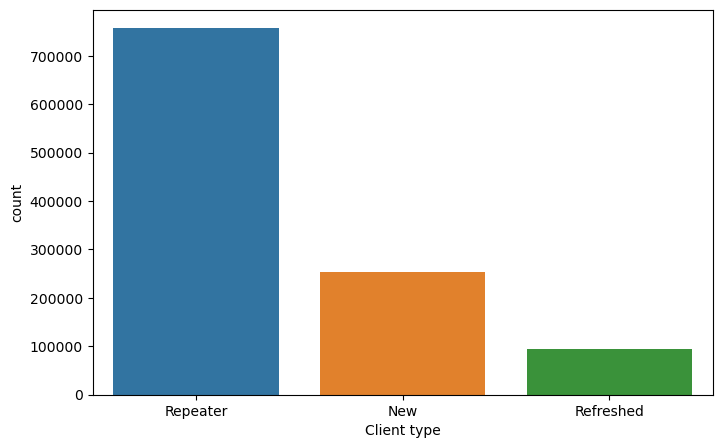

In [373]:
plt.figure(figsize=(8,5))
pal = sns.color_palette("tab10")
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged, palette = pal)
ax.set(xlabel='Client type')
plt.show()

**Observation**
-  Mostly the applicants were Repeater

-  **Portfolio of the previous applications**

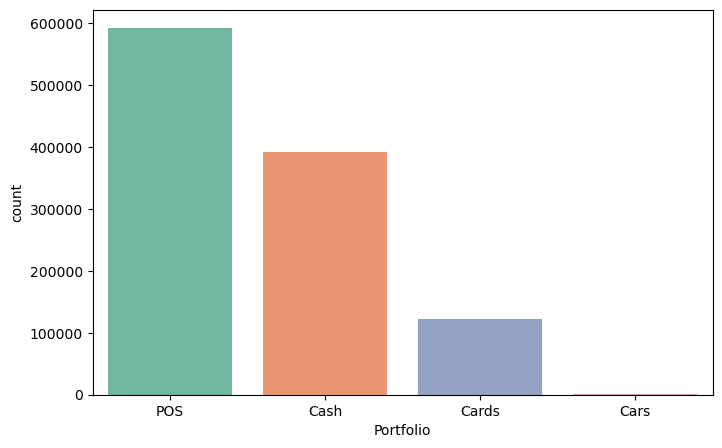

In [374]:
plt.figure(figsize=(8,5))
pale = sns.color_palette("Set2")
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged, palette = pale)
ax.set(xlabel='Portfolio')
plt.show()

**Observation**
-  The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

-  **Application channel type**

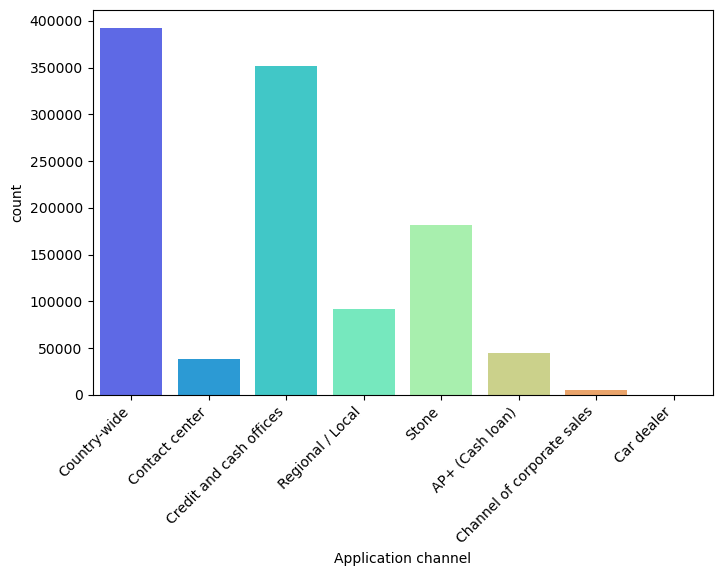

In [376]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged, palette="rainbow")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')
plt.show()

**Observations**
-  We see that Country-wide was heavily used for previous applications followed by Credit and Cash offices, Stone and Regional. Rest other channels are hardly used.

**Univariate analysis for continious variables**

-  **Applied loan amount**

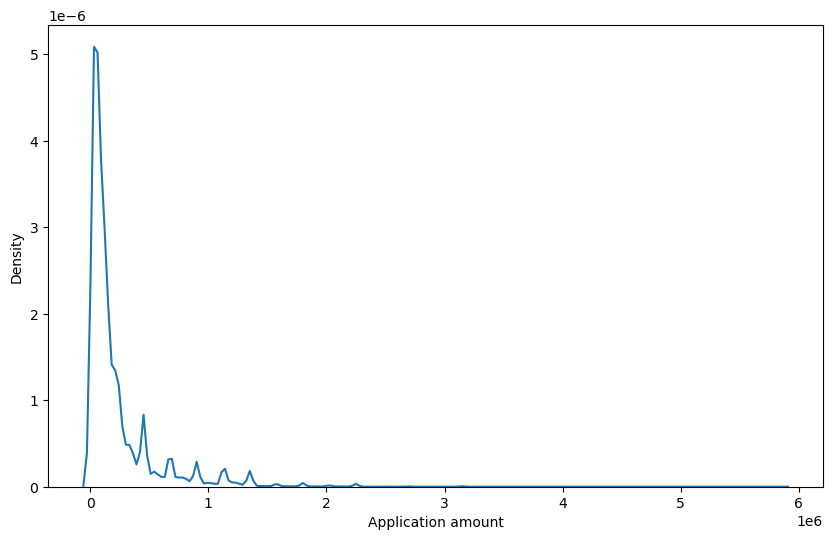

In [377]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')
plt.show()

**Observations**
-  Most of the applications were for the amount of below 250000 as we see from the above distribution.

-  **Months took for the pervious application decision relative to the current application**

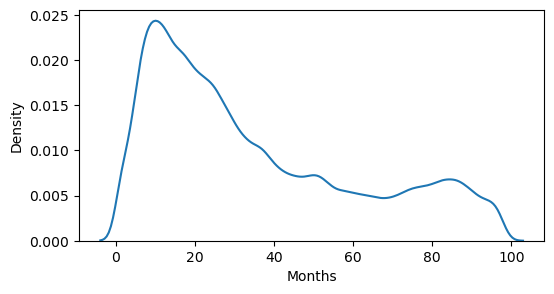

In [435]:
plt.figure(figsize=(6,3))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')
plt.show()

**Observations**
-  We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

**Bivariate analysis**

-  **Corelation of relevant numerical columns**

In [380]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [381]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
0,17145.00,17145.00,1730.43,100.00,12.00,3
1,607500.00,679671.00,25188.62,111.88,36.00,6
2,112500.00,136444.50,15060.74,121.28,12.00,11
3,450000.00,470790.00,47041.33,104.62,12.00,18
4,337500.00,404055.00,31924.40,119.72,24.00,27


In [382]:
# Corelation matrix
df_merged_corr.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,PERCENT_CREDIT,CNT_PAYMENT,MONTH_DECISION
AMT_APPLICATION,1.00,0.97,0.81,0.18,0.68,-0.31
AMT_CREDIT,0.97,1.00,0.82,0.25,0.68,-0.31
AMT_ANNUITY,0.81,0.82,1.00,0.20,0.40,-0.29
PERCENT_CREDIT,0.18,0.25,0.20,1.00,0.38,-0.28
CNT_PAYMENT,0.68,0.68,0.40,0.38,1.00,-0.25
MONTH_DECISION,-0.31,-0.31,-0.29,-0.28,-0.25,1.00


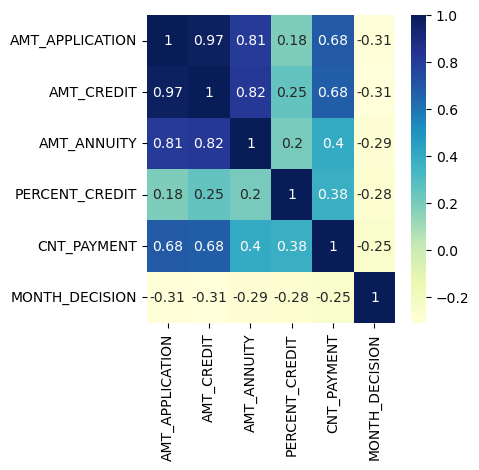

In [438]:
plt.figure(figsize=(4,4))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelate columns**
-  AMT_APPLICATION and AMT_CREDIT
-  AMT_APPLICATION and AMT_ANNUITY
-  AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
-  AMT_APPLICATION and CNT_PAYMENT
-  AMT_CREDIT and CNT_PAYMENT

**Bivariate analysis on continious variable**

-  **Application amount and credited amount**

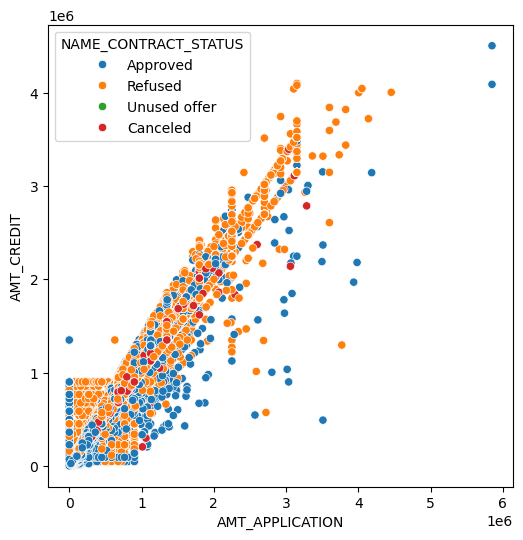

In [439]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

**Observation**
-  We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

**Application amount and the month taken to take decision related to current application**

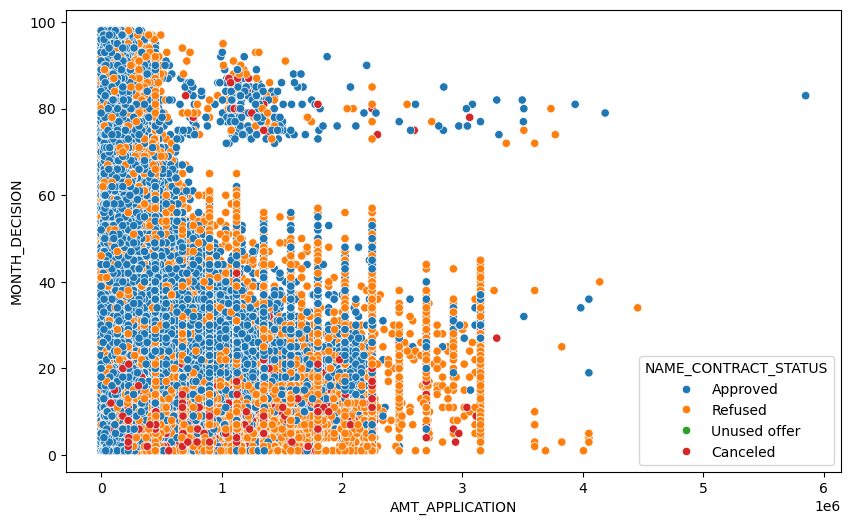

In [386]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

**Observation**
-  We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application.

**Bivariate analysis on categorical variable**

-  **Credit amount of the loan of various categories**

In [387]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

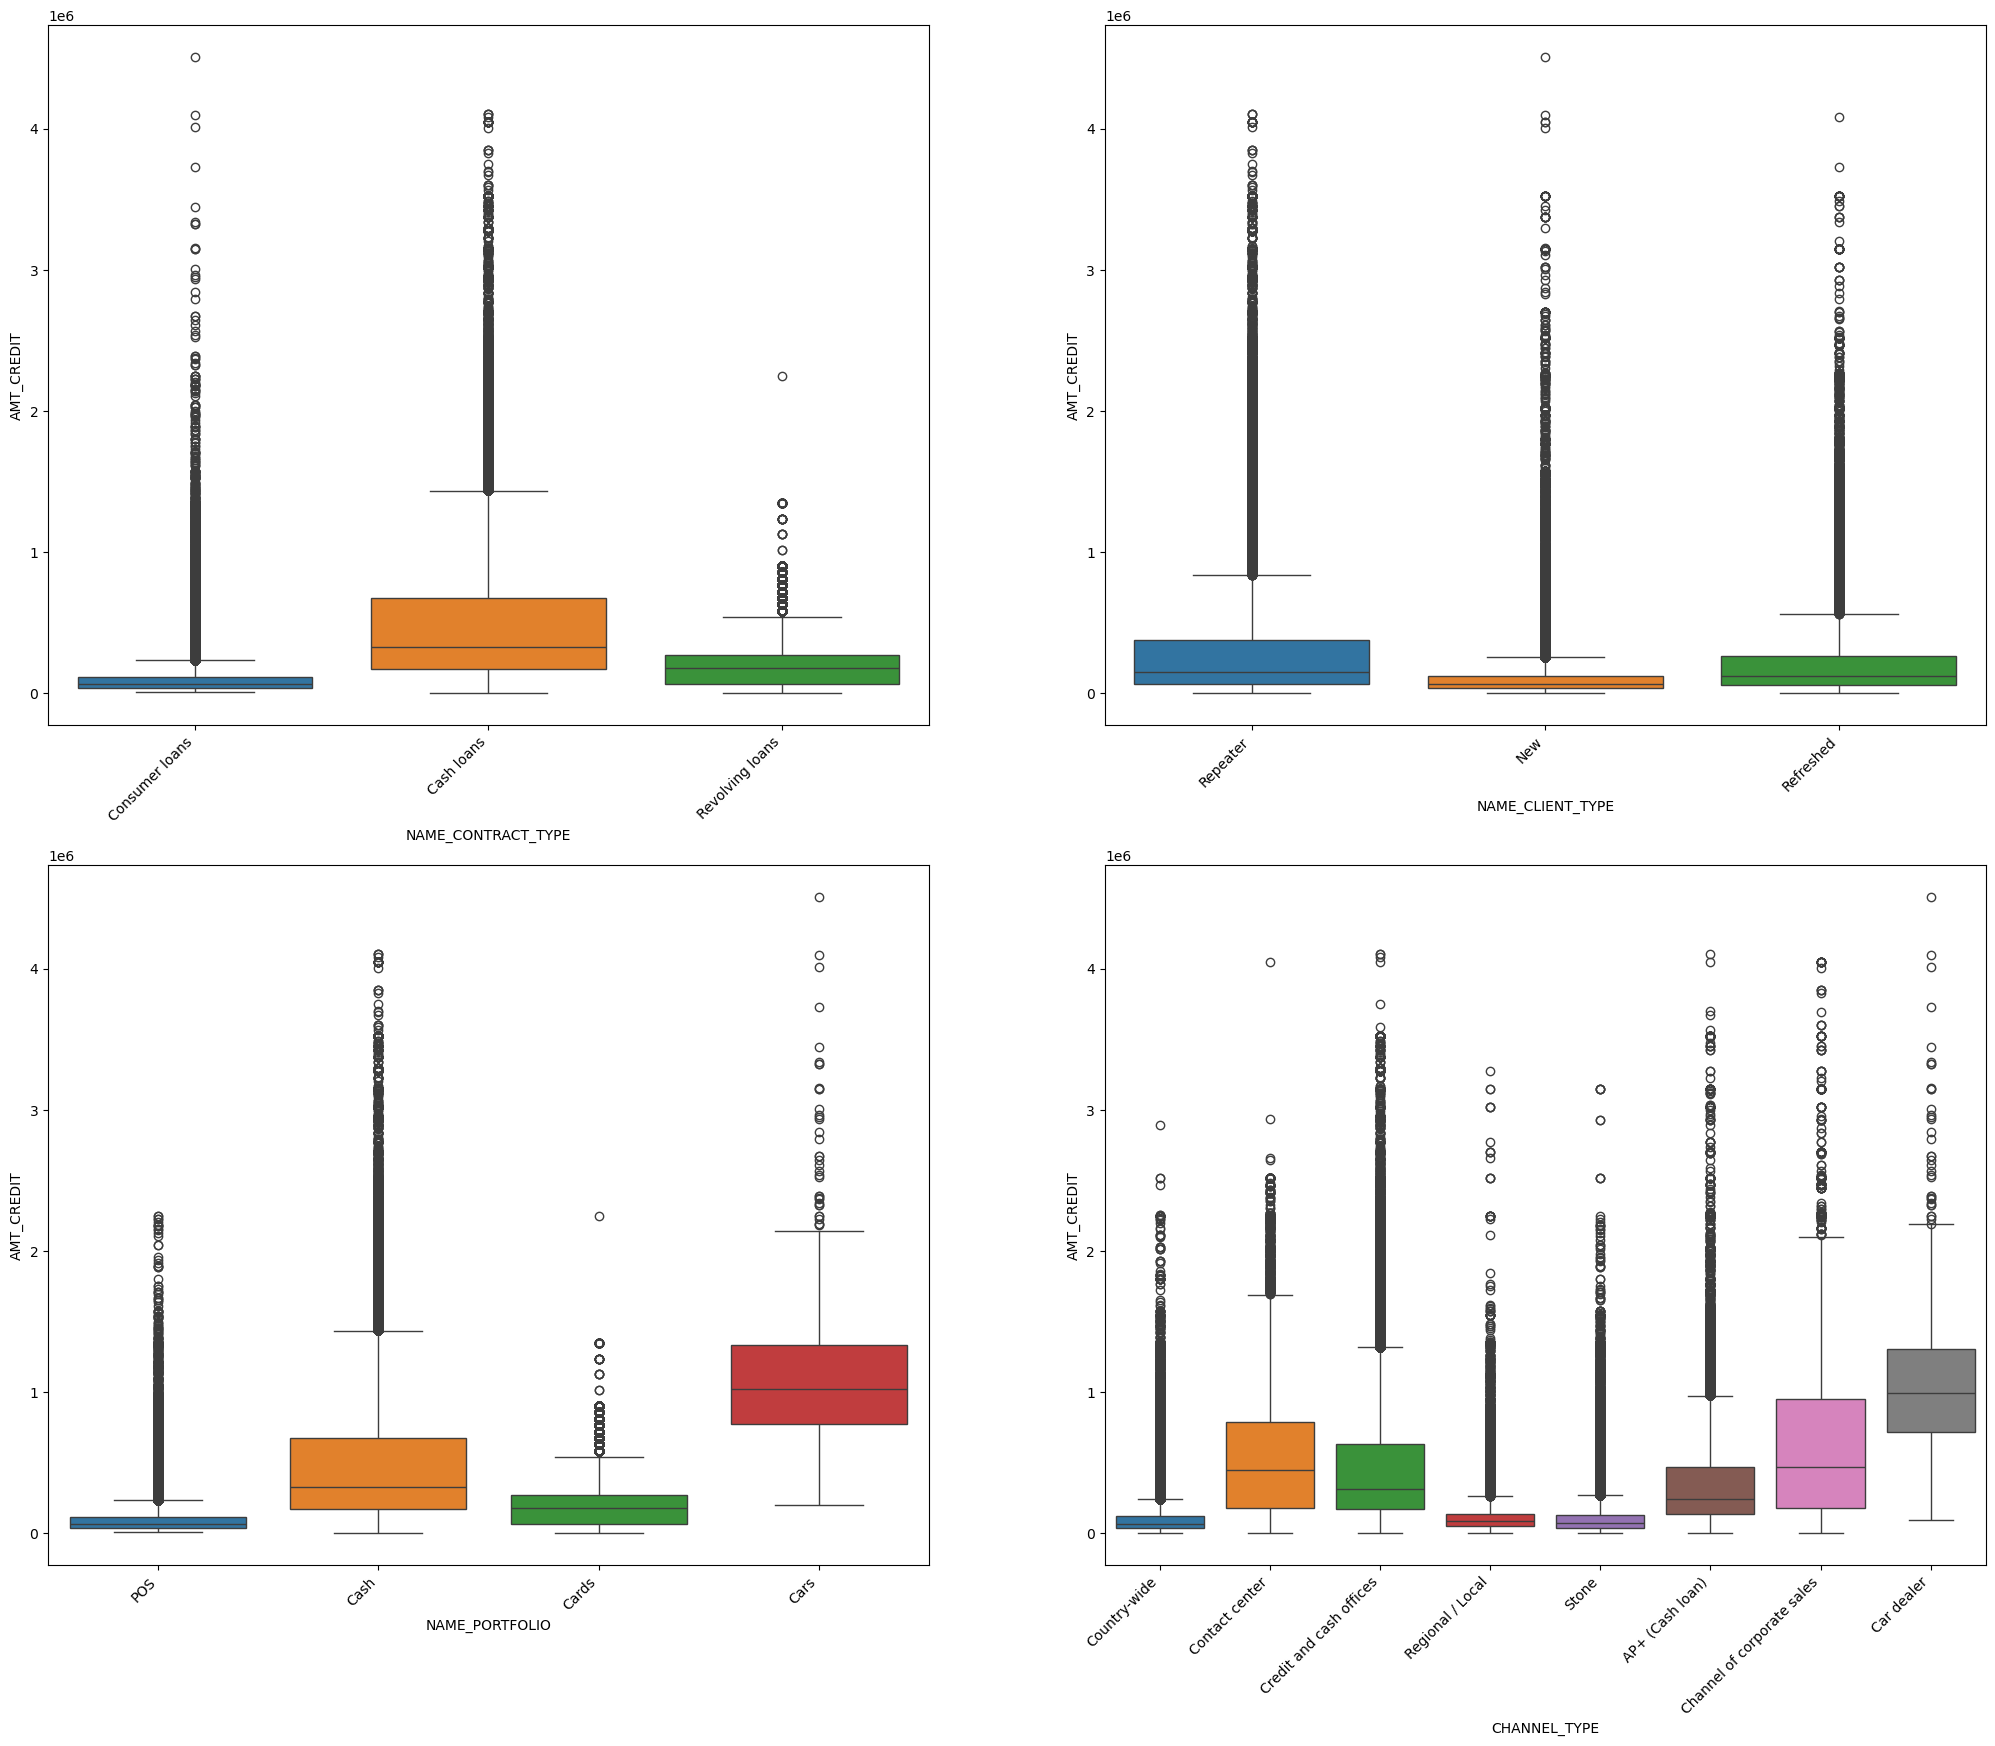

In [388]:
plt.figure(figsize=(25,20))
pal = sns.color_palette("tab10")
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged, palette = pal)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

**Observations**
-  Cash loans are more credited in amount than Revolving and Consumer loans.
-  Repeater clients get more amount loan than new and refreshed clients.
-  The loan with portfolio Cars are more amount credited followed by Cash.
-  The credit amount of the loan is more from the application channel type as car dealer followed by Channel of corporate sales, Credit and cash offices and Contact center. The amount is very less for Regional, Stone and Country-wide channels.

**Anslysis of two segmented variables**

-  **Status and Client type**

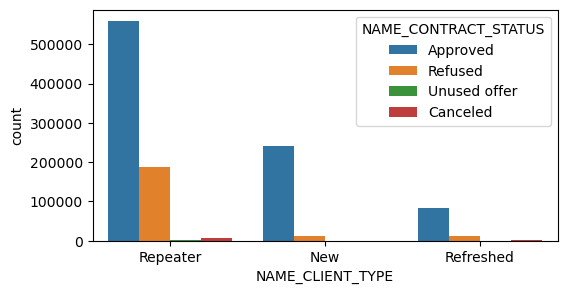

In [440]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )
plt.show()

**Observations**
-  We see that the Repeater clients have more approved loans than New and Refreshed clients.

-  **Current loan defaulter status with respect to previous loan application status**

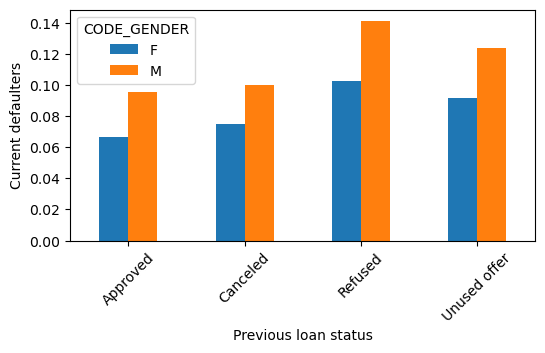

In [441]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(6,3),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
-  We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.

-  **Current loan defaulter status with respect to previous loan application status and client types**

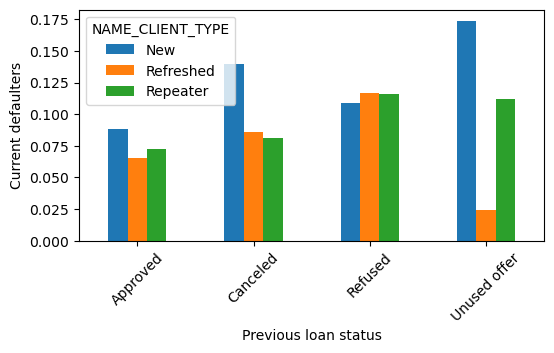

In [442]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(6,3),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
-  We can see that the Defaulters are more for previously Unused offers loan status clients, who were New.
-  For previously Approved status the New clients were more defaulted followed by Repeater.
-  For previously Refused applicants the Defaulters are more Refreshed clients.
-  For previously Canceled applicants the Defaulters are more New clients.

-  **Current loan defaulter status with respect to previous loan application status and age group**

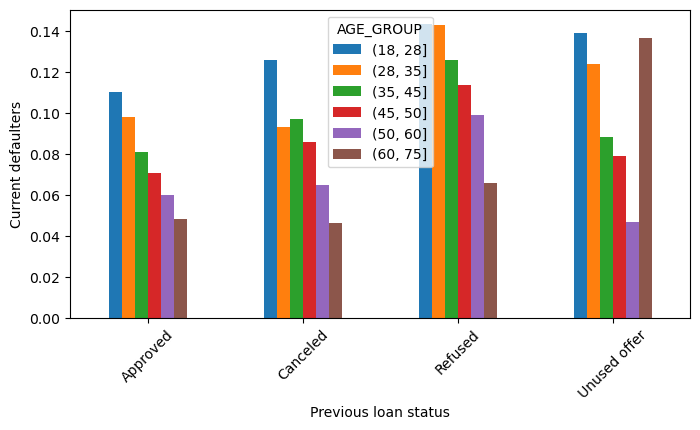

In [444]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,4),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
-  For all the previous status Young applicants are more defaulted.
-  For all the previous status Senior applicants are less defaulted compared to others.

-  **Current loan defaulter status with respect to previous loan application status and income group**

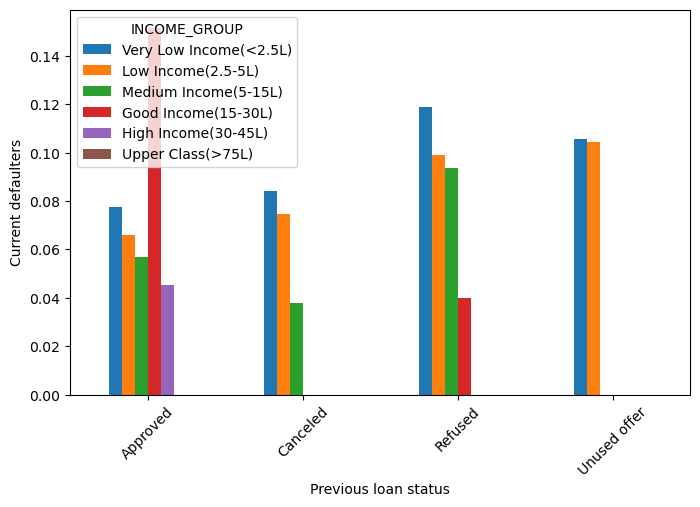

In [393]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
-  For previously Unused offer the Medium income group was more defaulted and Low income group is the least.
-  For other application status more or less all the income groups are equally defaulted.

-  **Current loan defaulter status with respect to previous loan application status and portfolio of the loan**

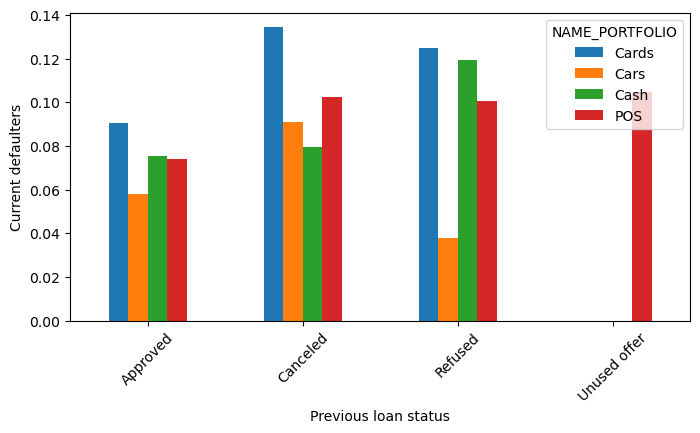

In [445]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,4),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
-  Most of the clients were defaulted, who previously applied loan for Cards.
-  For approved loan status the clients applied for Cars are less defaulted.
-  For Refused loan status the clients applied for POS are less defaulted.